# Manual inspection

## Essential functions

In [599]:
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))  # add parent path to sys, so we can import from other dirs
import pandas as pd
import torch
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from tqdm import tqdm
from IPython.display import clear_output
import numpy as np
from typing import Literal
from transformers import AutoTokenizer
import plotly.express as px


# def plot_vp(df, filename=None, save_legend=False):
#     plt.style.use('default')
    
#     # Set up the figure and axes
#     fig, ax = plt.subplots(figsize=(10, 8))
    
#     # Calculate the mean value patching scores across layers
#     mean_cueWordsVp_tensor = torch.stack(df['cueWordsVp_all_layersAndPos'].tolist(), dim=0).mean(dim=0)
#     layers = mean_cueWordsVp_tensor.size(1)
#     num_cues = mean_cueWordsVp_tensor.size(0)
    
#     # Plot the bar chart for each cue, ensuring all are visible
#     for c in range(num_cues):
#         ax.bar(range(1, layers + 1), mean_cueWordsVp_tensor[c, :], label=f'Cue {c}', linewidth=1.5, edgecolor='black')
    
#     # Set labels and formatting
#     fs = 30 if filename else 24
#     ax.set_xlabel('Layers', fontsize=fs)
#     ax.set_ylabel('Value patching Score', fontsize=fs)
#     ax.set_xticks(range(1, layers + 1))
#     ax.tick_params(axis='both', which='major', labelsize=fs-2)
#     ax.grid(True, linestyle='--', alpha=0.5)
#     ax.set_facecolor('#ffffff')

#     # Add the legend
#     handles, labels = ax.get_legend_handles_labels()
#     fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=fs-6)
    
#     # Set figure background color
#     fig.patch.set_facecolor('#ffffff')
#     # plt.tight_layout()
    
#     # Save or show the figure
#     if filename:
#         if save_legend:
#             plt.savefig(filename, bbox_inches='tight', dpi=300)
#         else:
#             plt.savefig(filename)
#         plt.close()
#     else:
#         plt.show()



# def plot_vp(df, file_name=None, save_legend=False):
#     plt.style.use('default')
#     mean_cueWordsVp_tensor = torch.stack(df['cueWordsVp_all_layersAndPos'].tolist(), dim=0).mean(dim=0)
#     fig, ax = plt.subplots(figsize=(15, 8))
    
#     layers = mean_cueWordsVp_tensor.shape[1]
#     num_cues = mean_cueWordsVp_tensor.shape[0]
#     group_width = 0.8
#     bar_width = group_width / num_cues
#     index = np.arange(layers)
    
#     for i in range(num_cues):
#         offset = (i - (num_cues - 1) / 2) * bar_width
#         ax.bar(index + offset, mean_cueWordsVp_tensor[i], bar_width, label=f'Cue {i}')
    
#     ax.set_ylabel('Value patching score')
#     ax.set_xlabel('Layer')
#     # ax.set_title('Grouped Bar Plot from Tensor Data')
#     ax.set_xticks(index)
#     ax.set_xticklabels([f'{i+1}' for i in range(layers)])
#     ax.legend()
    
#     # for i in range(num_cues):
#     #     for j, value in enumerate(mean_cueWordsVp_tensor[i]):
#     #         offset = (i - (num_cues - 1) / 2) * bar_width
#     #         ax.text(j + offset, value, f'{value:.4f}', ha='center', va='bottom', rotation=90, fontsize=8)
    
#     plt.tight_layout()
#     plt.show()



def plot_vp(df, file_name=None, ablation=False):
    plt.style.use('default')
    
    mean_cueWordsVp_tensor = torch.stack(df['cueWordsVp_all_layersAndPos'].tolist(), dim=0).mean(dim=0)
    layers = mean_cueWordsVp_tensor.shape[1]
    num_cues = mean_cueWordsVp_tensor.shape[0]
    
    if file_name:
        fig, ax = plt.subplots(figsize=(15, 10))
    else:
        fig, ax = plt.subplots(figsize=(15, 8))
    
    group_width = 0.7  # Adjusted to match `plot_cm`
    bar_width = group_width / num_cues
    index = np.arange(1, layers + 1)
    
    if not ablation:
        cue_labels = ['Cue 1 - first name', 'Cue 2 - last name'] + [f'Cue {c+1}' for c in range(2, num_cues)]
    else:
        cue_labels = ['Cue 1 - he/she'] + [f'Cue {c+1}' for c in range(1, num_cues)]
    
    for i in range(num_cues):
        offset = (i - (num_cues - 1) / 2) * bar_width
        ax.bar(index + offset, mean_cueWordsVp_tensor[i], bar_width, label=cue_labels[i], alpha=0.8)
    
    ax.set_xlim(0.5, layers + 0.5)
    
    # Adjusted font size according to the usage in `plot_cm`
    fs = 40 if file_name else 20
    # ax.set_ylabel('Value Patching Score', fontsize=fs)
    ax.set_xlabel('Layer', fontsize=fs)
    if num_cues == 2:
        ax.set_ylabel('Value Patching Score', fontsize=fs)
    else:
        ax.set_ylabel('')

    if not ablation:
        ax.set_title(f'#Cues = {num_cues}', fontsize=fs)
    else:
        ax.set_title(f'#Cues = {num_cues+1} - 1', fontsize=fs)
    # ax.set_title(f'#Cues = {num_cues}', fontsize=fs)
    ax.set_xticks(index)
    ax.set_xticklabels([f'{i}' for i in range(1, layers + 1)], fontsize=fs-2)
    ax.tick_params(axis='both', which='major', labelsize=fs-2)
    
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_facecolor('#ffffff')
    
    # Adjust legend location, size, and layout
    ax.legend(loc='upper left', fontsize=fs-6, bbox_to_anchor=(0.01, 0.99), ncol=1)
    
    fig.patch.set_facecolor('#ffffff')
    plt.tight_layout()
    
    if file_name:
        plt.savefig(file_name, bbox_inches='tight', dpi=300)
        plt.close()
    else:
        plt.show()



# def imshow(tensor, renderer=None, xaxis="", yaxis="", file_name=None, bold_indices=None, **kwargs):
#     if bold_indices is None:
#         bold_indices = []
    
#     x_labels = kwargs.get('x', [])
#     if x_labels:
#         x_labels = [f"<b>{label}</b>" if i in bold_indices else label for i, label in enumerate(x_labels)]
#         kwargs['x'] = x_labels

#     fig = px.imshow(
#         tensor.detach().numpy(), 
#         color_continuous_midpoint=0.0, 
#         color_continuous_scale="RdBu", 
#         labels={"x": xaxis, "y": yaxis}, 
#         **kwargs
#     )
    
#     fig.update_xaxes(tickangle=45)

#     # Center the title
#     fig.update_layout(
#         title={
#             'text': kwargs.get('title', ''),
#             'x': 0.5,
#             'xanchor': 'center',
#             'yanchor': 'top'
#         }
#     )

#     fig.show(renderer)
    
#     if file_name:
#         fig.update_layout(
#             width=3000, 
#             height=2000,
#             font=dict(size=50),
#             # Ensure the title remains centered when saving
#             title={
#                 'text': kwargs.get('title', ''),
#                 'x': 0.5,
#                 'xanchor': 'center',
#                 'yanchor': 'top'
#             }
#         )
#         save_dir = '../figs/sample'
#         if not os.path.exists(save_dir):
#             os.makedirs(save_dir)
#         file_path = os.path.join(save_dir, file_name)
#         fig.write_image(file_path)


# def imshow(tensor, renderer=None, xaxis="", yaxis="", file_name=None, bold_indices=None, **kwargs):
#     if bold_indices is None:
#         bold_indices = []
    
#     x_labels = kwargs.get('x', [])
#     if x_labels:
#         x_labels = [f"<b>{label}</b>" if i in bold_indices else label for i, label in enumerate(x_labels)]
#         kwargs['x'] = x_labels
#     fig = px.imshow(
#         tensor.detach().numpy(), 
#         color_continuous_midpoint=0.0, 
#         color_continuous_scale="RdBu", 
#         labels={"x": xaxis, "y": yaxis}, 
#         **kwargs
#     )
    
#     fig.update_xaxes(tickangle=45, tickfont=dict(color='black'))
#     fig.update_yaxes(tickfont=dict(color='black'))
    
#     # Update axis label colors
#     fig.update_xaxes(title_font=dict(color='black'))
#     fig.update_yaxes(title_font=dict(color='black'))
    
#     # Center the title
#     fig.update_layout(
#         title={
#             'text': kwargs.get('title', ''),
#             'x': 0.5,
#             'xanchor': 'center',
#             'yanchor': 'top'
#         }
#     )
#     fig.show(renderer)
    
#     if file_name:
#         fig.update_layout(
#             width=3000, 
#             height=2000,
#             font=dict(size=50, color='black'),  # Set font color to black for saved image
#             # Ensure the title remains centered when saving
#             title={
#                 'text': kwargs.get('title', ''),
#                 'x': 0.5,
#                 'xanchor': 'center',
#                 'yanchor': 'top'
#             }
#         )
#         save_dir = '../figs/sample'
#         if not os.path.exists(save_dir):
#             os.makedirs(save_dir)
#         file_path = os.path.join(save_dir, file_name)
#         fig.write_image(file_path)


def imshow(tensor, renderer=None, xaxis="", yaxis="", file_name=None, bold_indices=None, **kwargs):
    if bold_indices is None:
        bold_indices = []
    
    x_labels = kwargs.get('x', [])
    if x_labels:
        x_labels = [f"<b>{label}</b>" if i in bold_indices else label for i, label in enumerate(x_labels)]
        kwargs['x'] = x_labels

    # Create a list of y-axis labels from 1 to 12
    y_labels = list(range(1, 13))

    fig = px.imshow(
        tensor.detach().numpy(), 
        color_continuous_midpoint=0.0, 
        color_continuous_scale="RdBu", 
        labels={"x": xaxis, "y": yaxis}, 
        **kwargs
    )
    
    # Update y-axis ticks and labels
    fig.update_yaxes(
        tickmode='array',
        tickvals=list(range(len(y_labels))),
        ticktext=y_labels,
        tickfont=dict(color='black')
    )

    fig.update_xaxes(tickangle=45, tickfont=dict(color='black'))
    
    # Update axis label colors
    fig.update_xaxes(title_font=dict(color='black'))
    fig.update_yaxes(title_font=dict(color='black'))
    
    # Center the title
    fig.update_layout(
        title={
            'text': kwargs.get('title', ''),
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        }
    )
    fig.show(renderer)
    
    if file_name:
        fig.update_layout(
            width=3000, 
            height=2000,
            font=dict(size=50, color='black'),  # Set font color to black for saved image
            # Ensure the title remains centered when saving
            title={
                'text': kwargs.get('title', ''),
                'x': 0.5,
                'xanchor': 'center',
                'yanchor': 'top'
            }
        )
        save_dir = '../figs/sample'
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        file_path = os.path.join(save_dir, file_name)
        fig.write_image(file_path)



def extract_cueWords_vp(vp, cues_tokenIdxes):
    cue_words_vp = []
    num_cues = cues_tokenIdxes.shape[0]
    for c in range(num_cues):
        # cue_tokens_vp = torch.abs(vp)[:, cues_tokenIdxes[c,0]: cues_tokenIdxes[c,1]]
        cue_tokens_vp = vp[:, cues_tokenIdxes[c,0]: cues_tokenIdxes[c,1]]
        cue_word_vp, _ = torch.max(cue_tokens_vp, dim=1)
        cue_words_vp.append(cue_word_vp)
    return torch.stack(cue_words_vp)

## RoBERTa

### without fine-tuning

#### Examples with 2 cues

In [568]:
tokenizer = AutoTokenizer.from_pretrained('roberta-base')

df = pd.read_pickle('../results_vp/roberta-base_gender_agreement_2.pkl')
print('MASKED TEXT: ', df.iloc[0]['masked_text'])
print('CUE WORDS: ', df.iloc[0]['cue_words'])
print('TARGET WORD: ', df.iloc[0]['target_word'])
print('CLEAN TEXT: ', tokenizer.decode(df.iloc[0]['input_ids']))
print('CORRUPT TEXT: ', tokenizer.decode(df.iloc[0]['input_ids_corrupt']))
print('MODEL CLEAN PREDICTION: ', df.iloc[0]['model_top1_clean_prediction'])
print('MODEL CORRUPT PREDICTION: ', df.iloc[0]['model_top1_corrupt_prediction'])
print('DATAFRAME #ROWS: ', df.shape[0])

MASKED TEXT:  margaret becker is an american christian rock singer , guitarist , and songwriter . <mask> has had twenty-one no. 1 christian radio hits , won four dove awards , and been nominated for four grammy awards .
CUE WORDS:  ['margaret|0|8', 'becker|9|15']
TARGET WORD:  she
CLEAN TEXT:  <s>margaret becker is an american christian rock singer, guitarist, and songwriter.<mask> has had twenty-one no. 1 christian radio hits, won four dove awards, and been nominated for four grammy awards.</s>
CORRUPT TEXT:  <s> aron willinsky is an american christian rock singer, guitarist, and songwriter.<mask> has had twenty-one no. 1 christian radio hits, won four dove awards, and been nominated for four grammy awards.</s>
MODEL CLEAN PREDICTION:   She
MODEL CORRUPT PREDICTION:   He
DATAFRAME #ROWS:  124


In [407]:
# investigating examples with correct model prediction
equality_condition = (df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower()) | (' '+df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower())
df_equal = df.loc[equality_condition]

keep_idxes = []
for i in range(len(df_equal)):
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'he' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'she':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'she' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'he':
        keep_idxes.append(i)
        
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'his' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'her':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'her' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'his':
        keep_idxes.append(i)

    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'him' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'hers':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'hers' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'him':
        keep_idxes.append(i)

    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'himself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'herself':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'herself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'himself':
        keep_idxes.append(i)

df_equal = df_equal.iloc[keep_idxes]

print('DATAFRAME #ROWS: ', df_equal.shape[0])
print('ACCURACY: ', df_equal.shape[0]/df.shape[0] * 100, '%')

DATAFRAME #ROWS:  81
ACCURACY:  65.32258064516128 %


In [408]:
# add cue words vp scores
df_equal['cueWordsVp_all_layersAndPos'] = df_equal.apply(
        lambda row: extract_cueWords_vp(row['vp_all_layersAndPos'], row['cues_tokenIdxes']), 
        axis=1
    )

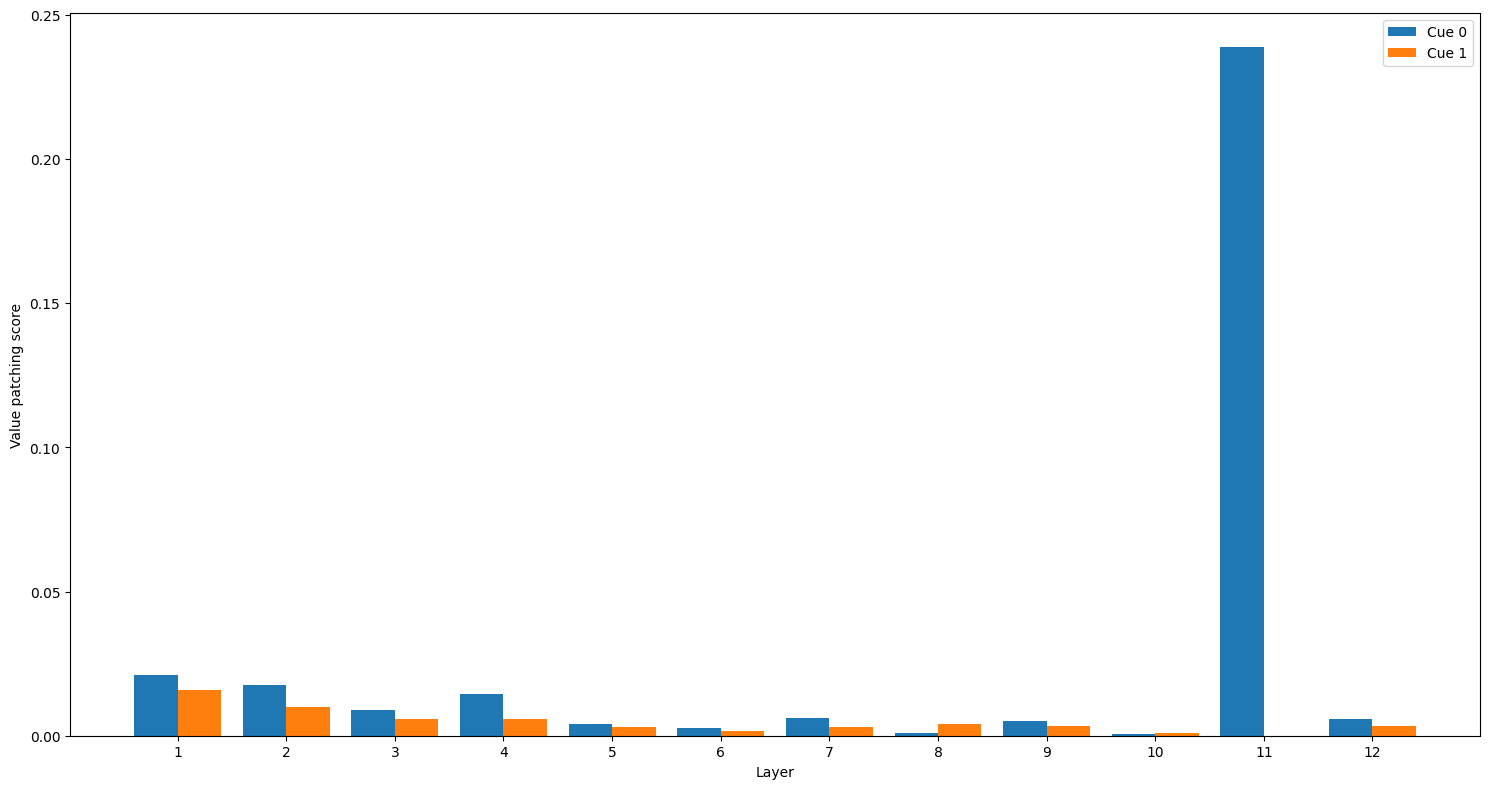

In [409]:
plot_vp(df_equal)

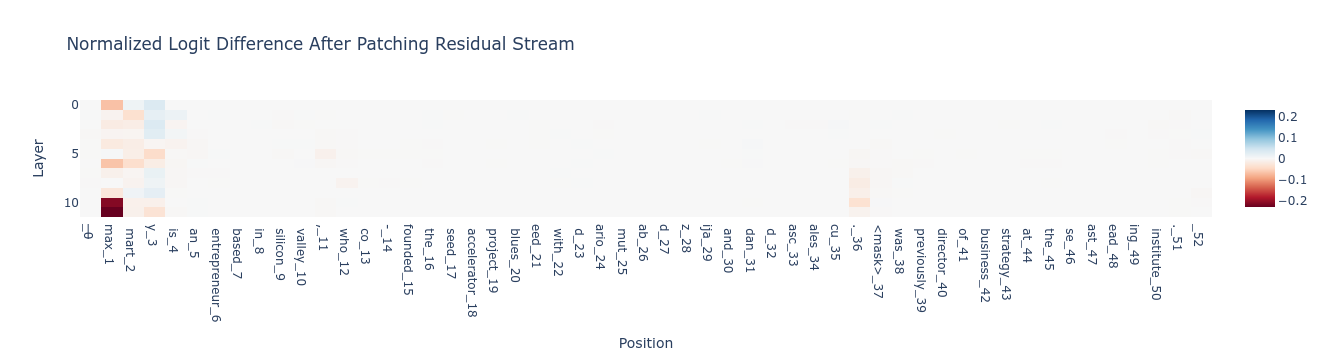

In [204]:
idx = 0
token_labels = [f"{tokenizer.decode(token)}_{index}" for index, token in enumerate(df.iloc[idx]['input_ids'])]
imshow(df.iloc[idx]['vp_all_layersAndPos'], x=token_labels, xaxis="Position", yaxis="Layer", title="Normalized Logit Difference After Patching Residual Stream")

#### Examples with 4 cues

In [471]:
df = pd.read_pickle('../results_vp/roberta-base_gender_agreement_4.pkl')
print('MASKED TEXT: ', df.iloc[0]['masked_text'])
print('CUE WORDS: ', df.iloc[0]['cue_words'])
print('TARGET WORD: ', df.iloc[0]['target_word'])
print('CLEAN TEXT: ', tokenizer.decode(df.iloc[0]['input_ids']))
print('CORRUPT TEXT: ', tokenizer.decode(df.iloc[0]['input_ids_corrupt']))
print('MODEL CLEAN PREDICTION: ', df.iloc[0]['model_top1_clean_prediction'])
print('MODEL CORRUPT PREDICTION: ', df.iloc[0]['model_top1_corrupt_prediction'])
print('DATAFRAME #ROWS: ', df.shape[0])

MASKED TEXT:  andy pyle is an english bass guitarist . he played with the kinks from 1976 -- 1978 . prior to that , he was in blodwyn pig and savoy brown . later , <mask> played with wishbone ash .
CUE WORDS:  ['andy|0|4', 'pyle|5|9', 'he|41|43', 'he|102|104']
TARGET WORD:  he
CLEAN TEXT:  <s>andy pyle is an english bass guitarist. he played with the kinks from 1976 -- 1978. prior to that, he was in blodwyn pig and savoy brown. later,<mask> played with wishbone ash.</s>
CORRUPT TEXT:  <s> amy willinsky is an english bass guitarist. she played with the kinks from 1976 -- 1978. prior to that, she was in blodwyn pig and savoy brown. later,<mask> played with wishbone ash.</s>
MODEL CLEAN PREDICTION:   he
MODEL CORRUPT PREDICTION:   she
DATAFRAME #ROWS:  124


In [462]:
minn = 1000
for i in range(len(df)):
    print(i, '--->', df.iloc[i]['input_ids'].shape[0])
    # if df.iloc[i]['input_ids'].shape[0] < minn:
    #     min_idx = i

0 ---> 47
1 ---> 59
2 ---> 57
3 ---> 101
4 ---> 48
5 ---> 101
6 ---> 92
7 ---> 64
8 ---> 42
9 ---> 98
10 ---> 83
11 ---> 92
12 ---> 54
13 ---> 147
14 ---> 48
15 ---> 110
16 ---> 63
17 ---> 59
18 ---> 43
19 ---> 61
20 ---> 64
21 ---> 117
22 ---> 61
23 ---> 61
24 ---> 83
25 ---> 46
26 ---> 56
27 ---> 83
28 ---> 69
29 ---> 67
30 ---> 84
31 ---> 32
32 ---> 96
33 ---> 76
34 ---> 59
35 ---> 77
36 ---> 67
37 ---> 97
38 ---> 326
39 ---> 82
40 ---> 76
41 ---> 95
42 ---> 60
43 ---> 56
44 ---> 45
45 ---> 66
46 ---> 63
47 ---> 57
48 ---> 77
49 ---> 27
50 ---> 38
51 ---> 68
52 ---> 81
53 ---> 79
54 ---> 84
55 ---> 81
56 ---> 57
57 ---> 157
58 ---> 48
59 ---> 94
60 ---> 68
61 ---> 69
62 ---> 74
63 ---> 80
64 ---> 78
65 ---> 59
66 ---> 68
67 ---> 50
68 ---> 36
69 ---> 50
70 ---> 85
71 ---> 120
72 ---> 79
73 ---> 86
74 ---> 59
75 ---> 39
76 ---> 126
77 ---> 120
78 ---> 99
79 ---> 96
80 ---> 60
81 ---> 47
82 ---> 61
83 ---> 51
84 ---> 59
85 ---> 50
86 ---> 55
87 ---> 69
88 ---> 52
89 ---> 85
90 ---> 75

In [473]:
tokenizer.decode(df.iloc[49]['input_ids'])

'<s>ron masak is an american actor. he began as a stage performer, and much of<mask> work is in theater.</s>'

In [412]:
# investigating examples with correct model prediction
equality_condition = (df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower()) | (' '+df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower())
df_equal = df.loc[equality_condition]

keep_idxes = []
for i in range(len(df_equal)):
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'he' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'she':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'she' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'he':
        keep_idxes.append(i)
        
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'his' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'her':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'her' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'his':
        keep_idxes.append(i)

    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'him' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'hers':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'hers' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'him':
        keep_idxes.append(i)

    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'himself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'herself':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'herself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'himself':
        keep_idxes.append(i)

df_equal = df_equal.iloc[keep_idxes]

print('DATAFRAME #ROWS: ', df_equal.shape[0])
print('ACCURACY: ', df_equal.shape[0]/df.shape[0] * 100, '%')

DATAFRAME #ROWS:  109
ACCURACY:  87.90322580645162 %


In [413]:
# add cue words vp scores
df_equal['cueWordsVp_all_layersAndPos'] = df_equal.apply(
        lambda row: extract_cueWords_vp(row['vp_all_layersAndPos'], row['cues_tokenIdxes']), 
        axis=1
    )

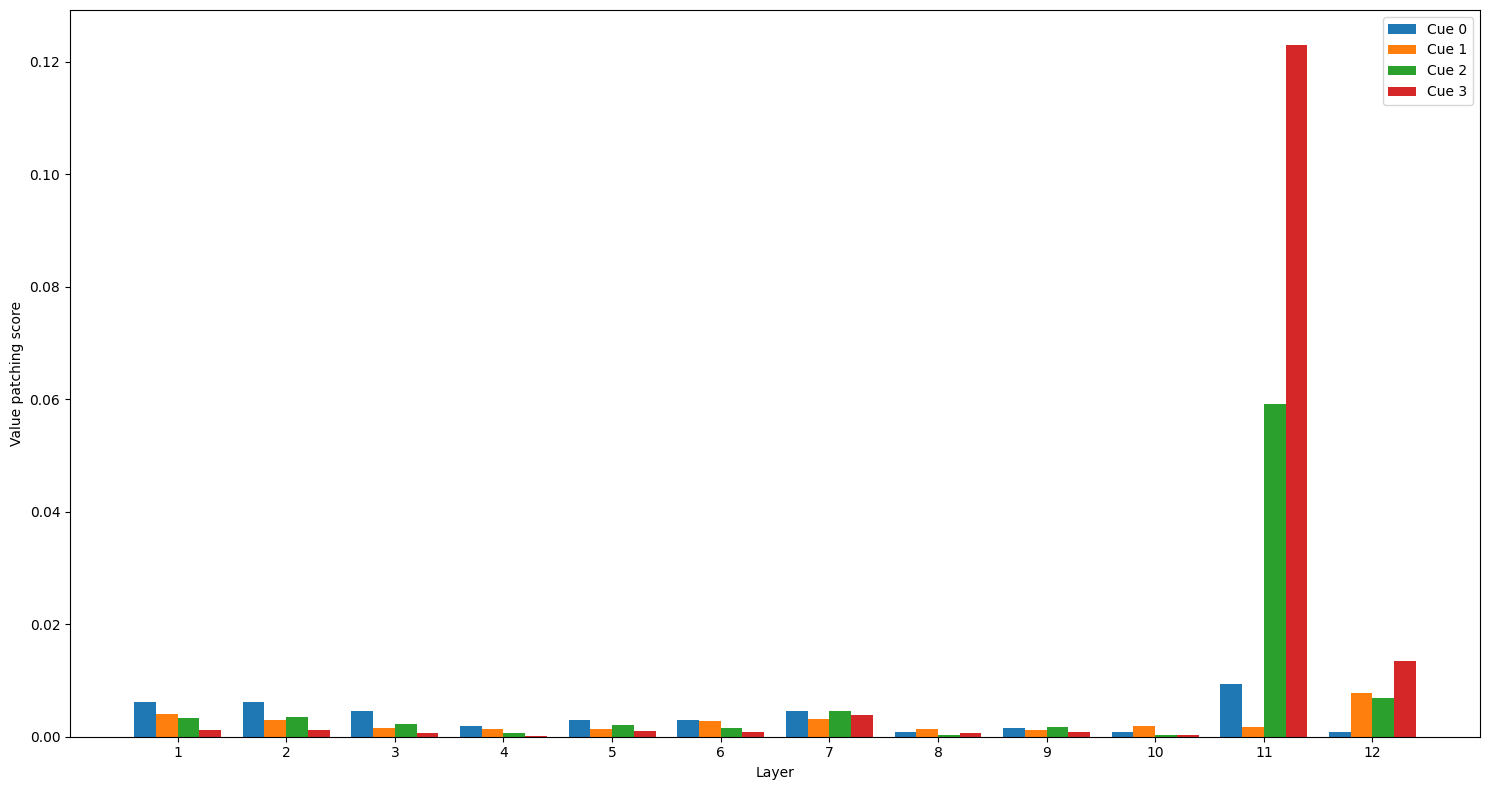

In [414]:
plot_vp(df_equal)

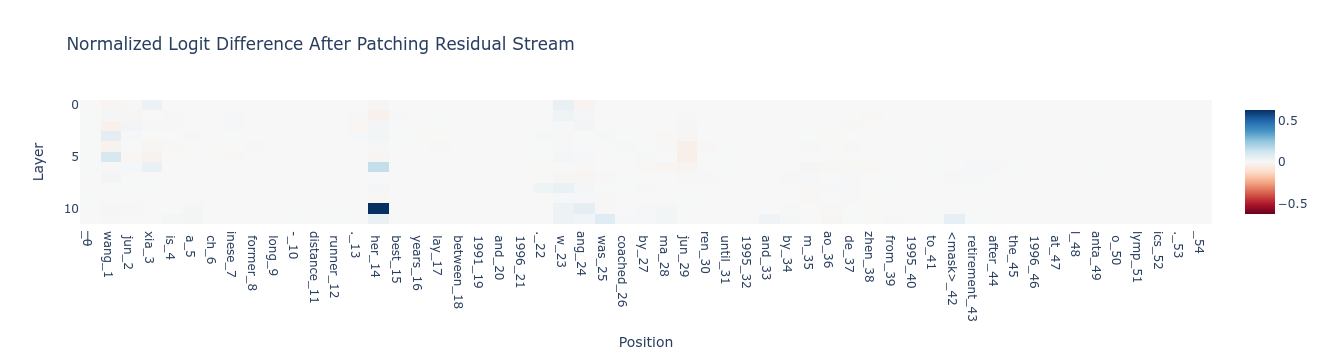

In [212]:
idx = 0

token_labels = [f"{tokenizer.decode(token)}_{index}" for index, token in enumerate(df.iloc[idx]['input_ids'])]
imshow(df.iloc[idx]['vp_all_layersAndPos'], x=token_labels, xaxis="Position", yaxis="Layer", title="Normalized Logit Difference After Patching Residual Stream")

#### Examples with 6 cues

In [415]:
df = pd.read_pickle('../results_vp/roberta-base_gender_agreement_6.pkl')
print('MASKED TEXT: ', df.iloc[0]['masked_text'])
print('CUE WORDS: ', df.iloc[0]['cue_words'])
print('TARGET WORD: ', df.iloc[0]['target_word'])
print('CLEAN TEXT: ', tokenizer.decode(df.iloc[0]['input_ids']))
print('CORRUPT TEXT: ', tokenizer.decode(df.iloc[0]['input_ids_corrupt']))
print('MODEL CLEAN PREDICTION: ', df.iloc[0]['model_top1_clean_prediction'])
print('MODEL CORRUPT PREDICTION: ', df.iloc[0]['model_top1_corrupt_prediction'])
print('DATAFRAME #ROWS: ', df.shape[0])

MASKED TEXT:  gary hughes is an english hard rock singer , songwriter and musician . apart from his work as a solo artist , gary hughes is the front man and main songwriter of hard rock/melodic rock band ten . <mask> has also worked as a producer and songwriter for bob catley 's first three solo albums , as well as hugo 's first album and has appeared on vinny burns ' `` the journey '' solo album and on the `` ayreonauts only '' album by the band ayreon .
CUE WORDS:  ['gary|0|4', 'hughes|5|11', 'his|82|85', 'gary|110|114', 'hughes|115|121', 'man|135|138']
TARGET WORD:  he
CLEAN TEXT:  <s>gary hughes is an english hard rock singer, songwriter and musician. apart from his work as a solo artist, gary hughes is the front man and main songwriter of hard rock/melodic rock band ten.<mask> has also worked as a producer and songwriter for bob catley's first three solo albums, as well as hugo's first album and has appeared on vinny burns'`` the journey '' solo album and on the `` ayreonauts only

In [416]:
# investigating examples with correct model prediction
equality_condition = (df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower()) | (' '+df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower())
df_equal = df.loc[equality_condition]

keep_idxes = []
for i in range(len(df_equal)):
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'he' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'she':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'she' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'he':
        keep_idxes.append(i)
        
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'his' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'her':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'her' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'his':
        keep_idxes.append(i)

    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'him' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'hers':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'hers' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'him':
        keep_idxes.append(i)

    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'himself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'herself':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'herself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'himself':
        keep_idxes.append(i)

df_equal = df_equal.iloc[keep_idxes]

print('DATAFRAME #ROWS: ', df_equal.shape[0])
print('ACCURACY: ', df_equal.shape[0]/df.shape[0] * 100, '%')

DATAFRAME #ROWS:  93
ACCURACY:  84.54545454545455 %


In [417]:
# add cue words vp scores
df_equal['cueWordsVp_all_layersAndPos'] = df_equal.apply(
        lambda row: extract_cueWords_vp(row['vp_all_layersAndPos'], row['cues_tokenIdxes']), 
        axis=1
    )

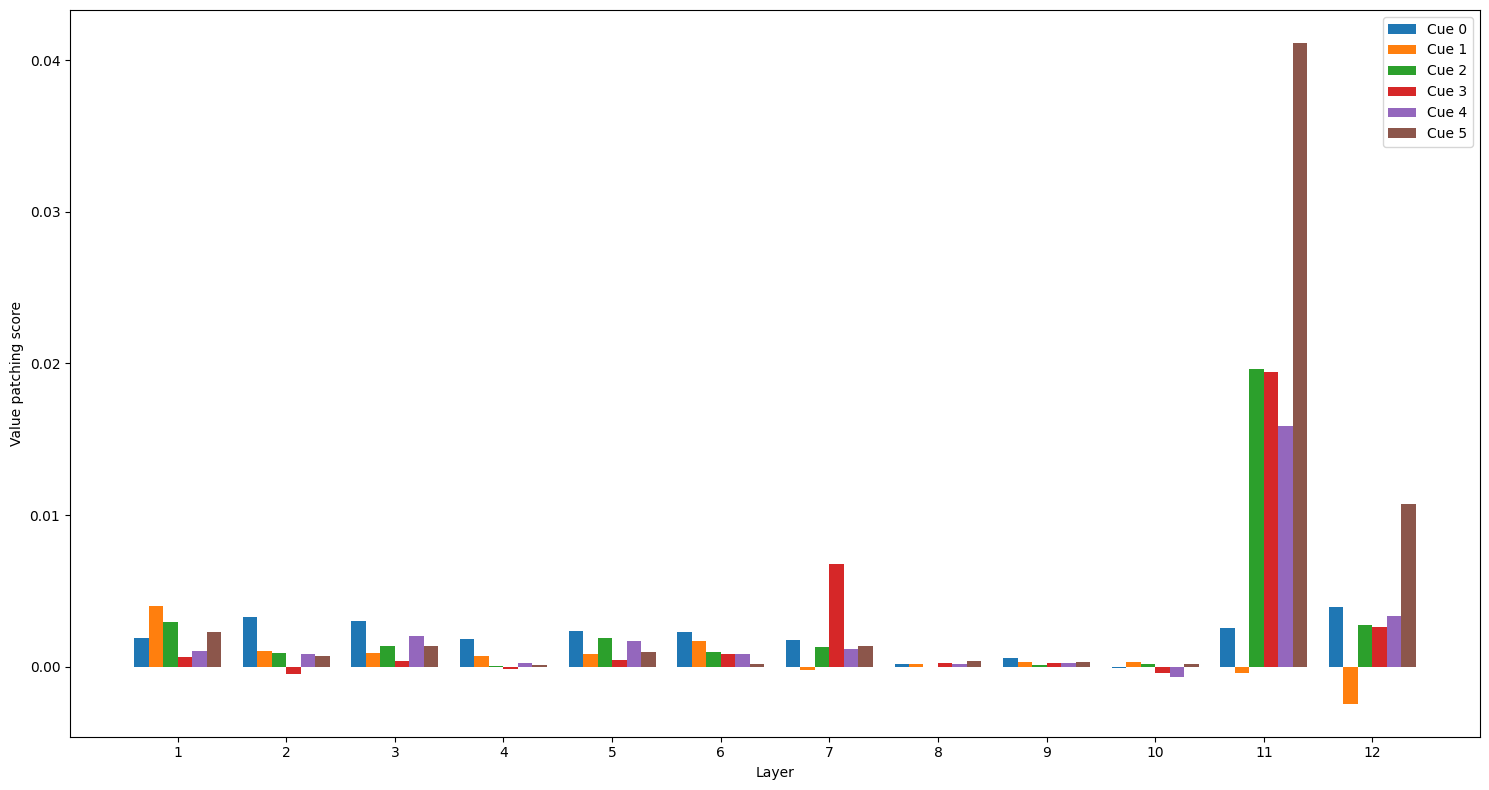

In [418]:
plot_vp(df_equal)

### with fine-tuning

#### Examples with 2 cues

In [419]:
df = pd.read_pickle('../results_vp/finetuned-roberta_gender_agreement_2.pkl')
print('MASKED TEXT: ', df.iloc[0]['masked_text'])
print('CUE WORDS: ', df.iloc[0]['cue_words'])
print('TARGET WORD: ', df.iloc[0]['target_word'])
print('CLEAN TEXT: ', tokenizer.decode(df.iloc[0]['input_ids']))
print('CORRUPT TEXT: ', tokenizer.decode(df.iloc[0]['input_ids_corrupt']))
print('MODEL CLEAN PREDICTION: ', df.iloc[0]['model_top1_clean_prediction'])
print('MODEL CORRUPT PREDICTION: ', df.iloc[0]['model_top1_corrupt_prediction'])
print('DATAFRAME #ROWS: ', df.shape[0])

MASKED TEXT:  margaret becker is an american christian rock singer , guitarist , and songwriter . <mask> has had twenty-one no. 1 christian radio hits , won four dove awards , and been nominated for four grammy awards .
CUE WORDS:  ['margaret|0|8', 'becker|9|15']
TARGET WORD:  she
CLEAN TEXT:  <s>margaret becker is an american christian rock singer, guitarist, and songwriter.<mask> has had twenty-one no. 1 christian radio hits, won four dove awards, and been nominated for four grammy awards.</s>
CORRUPT TEXT:  <s> aron willinsky is an american christian rock singer, guitarist, and songwriter.<mask> has had twenty-one no. 1 christian radio hits, won four dove awards, and been nominated for four grammy awards.</s>
MODEL CLEAN PREDICTION:   he
MODEL CORRUPT PREDICTION:   He
DATAFRAME #ROWS:  124


In [420]:
# investigating examples with correct model prediction
equality_condition = (df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower()) | (' '+df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower())
df_equal = df.loc[equality_condition]

keep_idxes = []
for i in range(len(df_equal)):
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'he' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'she':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'she' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'he':
        keep_idxes.append(i)
        
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'his' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'her':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'her' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'his':
        keep_idxes.append(i)

    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'him' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'hers':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'hers' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'him':
        keep_idxes.append(i)

    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'himself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'herself':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'herself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'himself':
        keep_idxes.append(i)

df_equal = df_equal.iloc[keep_idxes]

print('DATAFRAME #ROWS: ', df_equal.shape[0])
print('ACCURACY: ', df_equal.shape[0]/df.shape[0] * 100, '%')

DATAFRAME #ROWS:  55
ACCURACY:  44.354838709677416 %


In [421]:
# add cue words vp scores
df_equal['cueWordsVp_all_layersAndPos'] = df_equal.apply(
        lambda row: extract_cueWords_vp(row['vp_all_layersAndPos'], row['cues_tokenIdxes']), 
        axis=1
    )

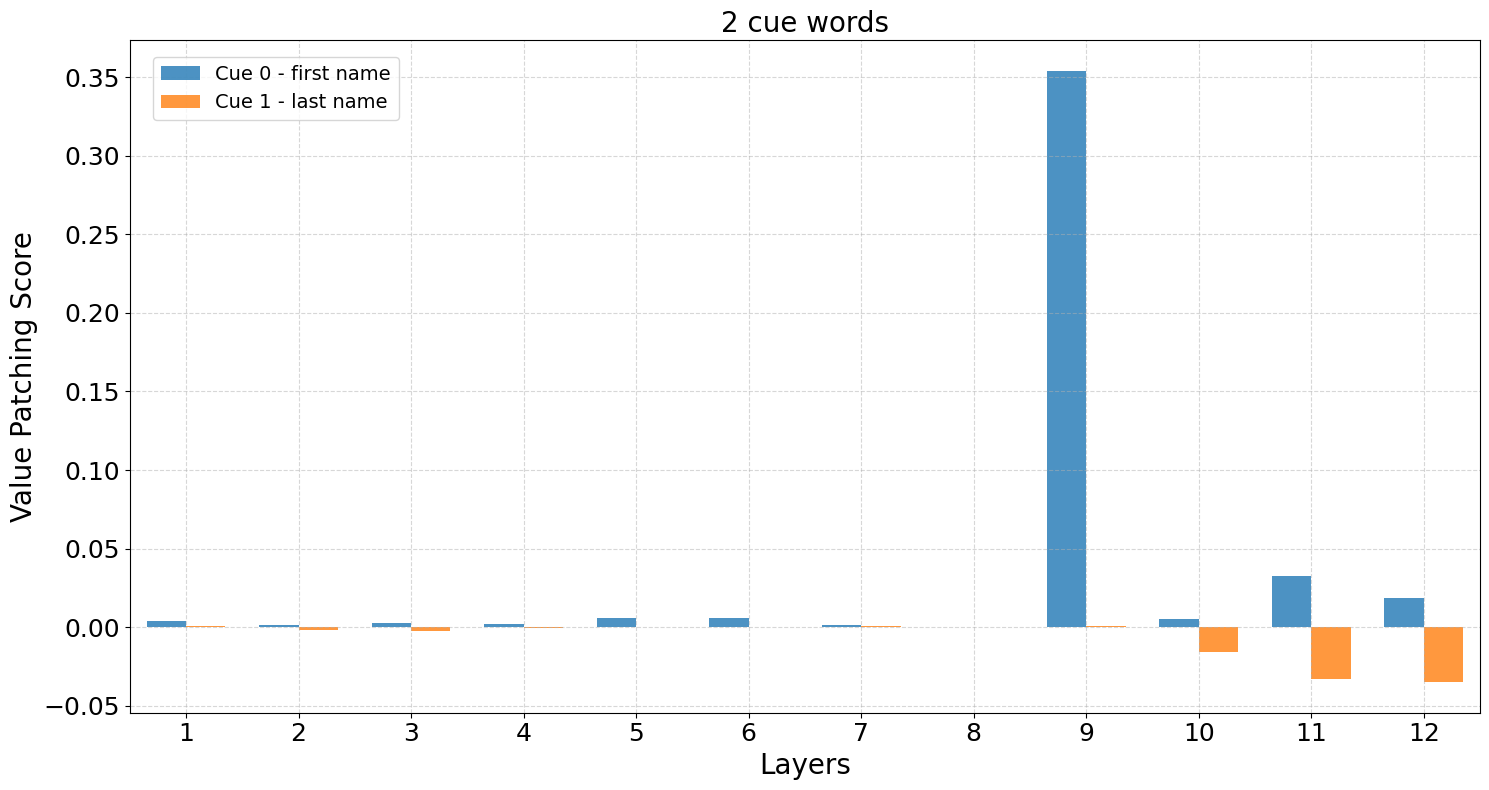

In [443]:
plot_vp(df_equal)

#### Examples with 4 cues

In [444]:
df = pd.read_pickle('../results_vp/finetuned-roberta_gender_agreement_4.pkl')
print('MASKED TEXT: ', df.iloc[0]['masked_text'])
print('CUE WORDS: ', df.iloc[0]['cue_words'])
print('TARGET WORD: ', df.iloc[0]['target_word'])
print('CLEAN TEXT: ', tokenizer.decode(df.iloc[0]['input_ids']))
print('CORRUPT TEXT: ', tokenizer.decode(df.iloc[0]['input_ids_corrupt']))
print('MODEL CLEAN PREDICTION: ', df.iloc[0]['model_top1_clean_prediction'])
print('MODEL CORRUPT PREDICTION: ', df.iloc[0]['model_top1_corrupt_prediction'])
print('DATAFRAME #ROWS: ', df.shape[0])

MASKED TEXT:  andy pyle is an english bass guitarist . he played with the kinks from 1976 -- 1978 . prior to that , he was in blodwyn pig and savoy brown . later , <mask> played with wishbone ash .
CUE WORDS:  ['andy|0|4', 'pyle|5|9', 'he|41|43', 'he|102|104']
TARGET WORD:  he
CLEAN TEXT:  [PAD]ations [unused176] estadio [unused15] [unused40] fights sensory [unused474] [unused36] [unused697] [unused18] [unused4] [unused444] cf [unused30] praying [unused475]ime [unused474] would [unused6] [unused13] see [unused36] [unused20] [unused10]ri ⟩ 40th pioneering [unused7] andhra house classified [unused474] [unused418] see [unused697] [unused18] wall reassigned flung [unused474] [unused1]
CORRUPT TEXT:  [PAD] [unused39] 370 [unused15] [unused40] fights sensory [unused474] [unused78] [unused697] [unused18] [unused4] [unused444] cf [unused30] praying [unused475]ime [unused474] would [unused6] [unused13] see [unused78] [unused20] [unused10]ri ⟩ 40th pioneering [unused7] andhra house classified [u

In [445]:
# investigating examples with correct model prediction
equality_condition = (df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower()) | (' '+df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower())
df_equal = df.loc[equality_condition]

keep_idxes = []
for i in range(len(df_equal)):
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'he' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'she':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'she' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'he':
        keep_idxes.append(i)
        
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'his' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'her':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'her' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'his':
        keep_idxes.append(i)

    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'him' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'hers':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'hers' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'him':
        keep_idxes.append(i)

    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'himself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'herself':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'herself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'himself':
        keep_idxes.append(i)

df_equal = df_equal.iloc[keep_idxes]

print('DATAFRAME #ROWS: ', df_equal.shape[0])
print('ACCURACY: ', df_equal.shape[0]/df.shape[0] * 100, '%')

DATAFRAME #ROWS:  91
ACCURACY:  73.38709677419355 %


In [446]:
# add cue words vp scores
df_equal['cueWordsVp_all_layersAndPos'] = df_equal.apply(
        lambda row: extract_cueWords_vp(row['vp_all_layersAndPos'], row['cues_tokenIdxes']), 
        axis=1
    )

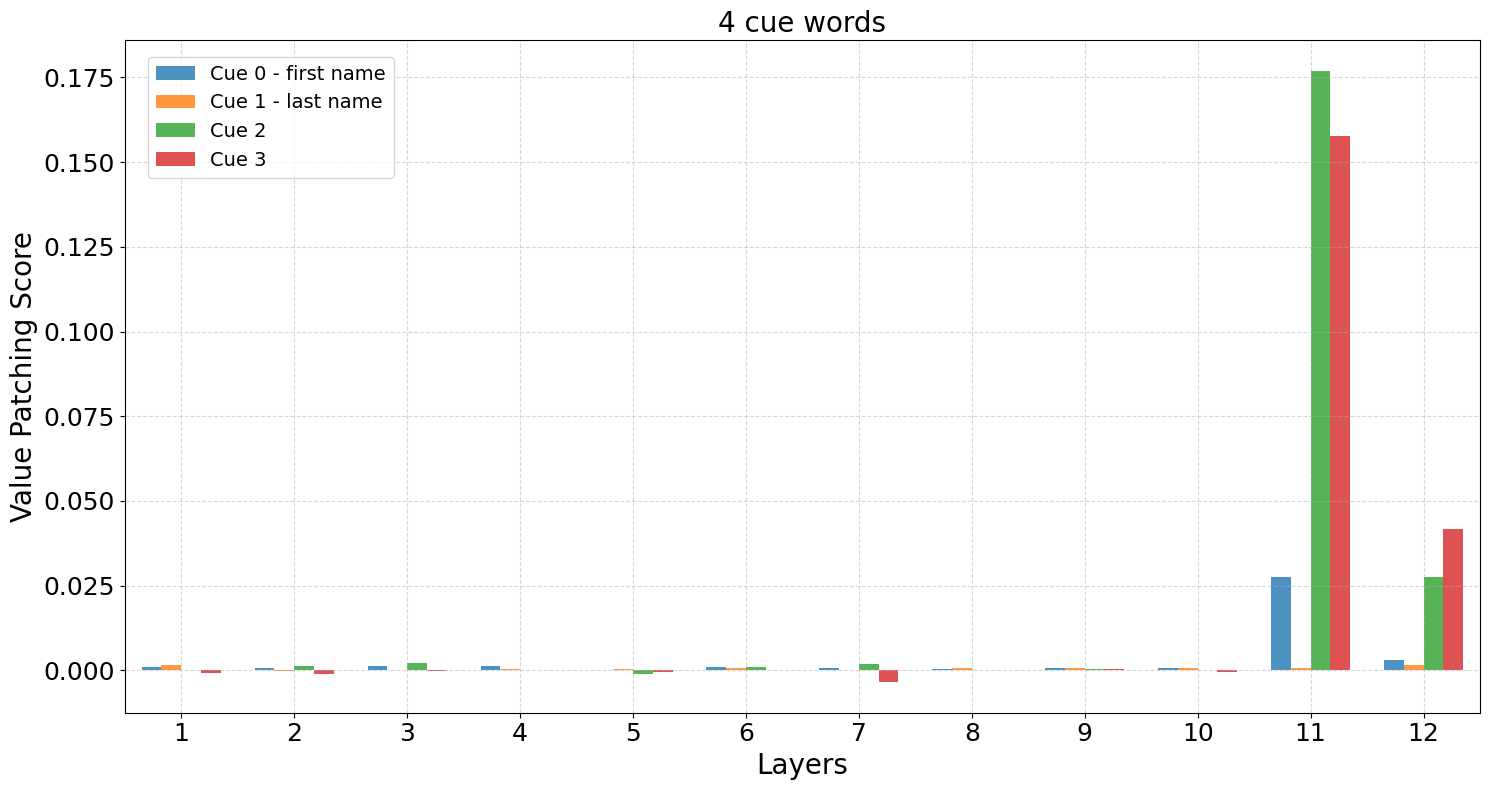

In [447]:
plot_vp(df_equal)

#### Examples with 6 cues

In [427]:
df = pd.read_pickle('../results_vp/finetuned-roberta_gender_agreement_6.pkl')
print('MASKED TEXT: ', df.iloc[0]['masked_text'])
print('CUE WORDS: ', df.iloc[0]['cue_words'])
print('TARGET WORD: ', df.iloc[0]['target_word'])
print('CLEAN TEXT: ', tokenizer.decode(df.iloc[0]['input_ids']))
print('CORRUPT TEXT: ', tokenizer.decode(df.iloc[0]['input_ids_corrupt']))
print('MODEL CLEAN PREDICTION: ', df.iloc[0]['model_top1_clean_prediction'])
print('MODEL CORRUPT PREDICTION: ', df.iloc[0]['model_top1_corrupt_prediction'])
print('DATAFRAME #ROWS: ', df.shape[0])

MASKED TEXT:  gary hughes is an english hard rock singer , songwriter and musician . apart from his work as a solo artist , gary hughes is the front man and main songwriter of hard rock/melodic rock band ten . <mask> has also worked as a producer and songwriter for bob catley 's first three solo albums , as well as hugo 's first album and has appeared on vinny burns ' `` the journey '' solo album and on the `` ayreonauts only '' album by the band ayreon .
CUE WORDS:  ['gary|0|4', 'hughes|5|11', 'his|82|85', 'gary|110|114', 'hughes|115|121', 'man|135|138']
TARGET WORD:  he
CLEAN TEXT:  <s>gary hughes is an english hard rock singer, songwriter and musician. apart from his work as a solo artist, gary hughes is the front man and main songwriter of hard rock/melodic rock band ten.<mask> has also worked as a producer and songwriter for bob catley's first three solo albums, as well as hugo's first album and has appeared on vinny burns'`` the journey '' solo album and on the `` ayreonauts only

In [428]:
# investigating examples with correct model prediction
equality_condition = (df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower()) | (' '+df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower())
df_equal = df.loc[equality_condition]

keep_idxes = []
for i in range(len(df_equal)):
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'he' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'she':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'she' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'he':
        keep_idxes.append(i)
        
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'his' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'her':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'her' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'his':
        keep_idxes.append(i)

    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'him' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'hers':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'hers' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'him':
        keep_idxes.append(i)

    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'himself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'herself':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'herself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'himself':
        keep_idxes.append(i)

df_equal = df_equal.iloc[keep_idxes]

print('DATAFRAME #ROWS: ', df_equal.shape[0])
print('ACCURACY: ', df_equal.shape[0]/df.shape[0] * 100, '%')

DATAFRAME #ROWS:  71
ACCURACY:  64.54545454545455 %


In [429]:
# add cue words vp scores
df_equal['cueWordsVp_all_layersAndPos'] = df_equal.apply(
        lambda row: extract_cueWords_vp(row['vp_all_layersAndPos'], row['cues_tokenIdxes']), 
        axis=1
    )

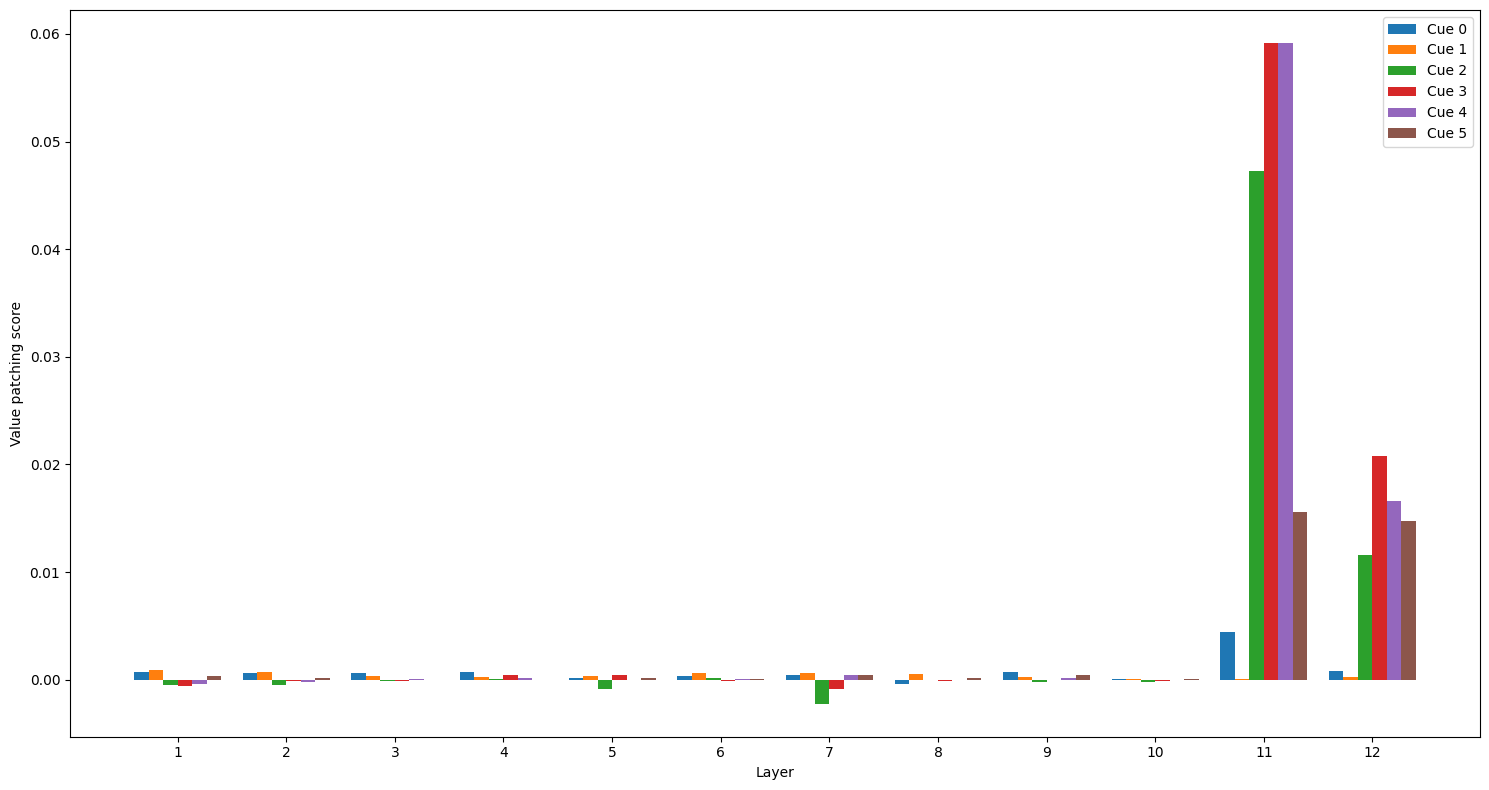

In [430]:
plot_vp(df_equal)

## BERT

### without fine-tuning

#### Examples with 2 cues

In [600]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

df = pd.read_pickle('../results_vp/bert-base-uncased_gender_agreement_2.pkl')
print('MASKED TEXT: ', df.iloc[0]['masked_text'])
print('CUE WORDS: ', df.iloc[0]['cue_words'])
print('TARGET WORD: ', df.iloc[0]['target_word'])
print('CLEAN TEXT: ', tokenizer.decode(df.iloc[0]['input_ids']))
print('CORRUPT TEXT: ', tokenizer.decode(df.iloc[0]['input_ids_corrupt']))
print('MODEL CLEAN PREDICTION: ', df.iloc[0]['model_top1_clean_prediction'])
print('MODEL CORRUPT PREDICTION: ', df.iloc[0]['model_top1_corrupt_prediction'])
print('DATAFRAME #ROWS: ', df.shape[0])

MASKED TEXT:  margaret becker is an american christian rock singer , guitarist , and songwriter . [MASK] has had twenty-one no. 1 christian radio hits , won four dove awards , and been nominated for four grammy awards .
CUE WORDS:  ['margaret|0|8', 'becker|9|15']
TARGET WORD:  she
CLEAN TEXT:  [CLS] margaret becker is an american christian rock singer, guitarist, and songwriter. [MASK] has had twenty - one no. 1 christian radio hits, won four dove awards, and been nominated for four grammy awards. [SEP]
CORRUPT TEXT:  [CLS] bob walker is an american christian rock singer, guitarist, and songwriter. [MASK] has had twenty - one no. 1 christian radio hits, won four dove awards, and been nominated for four grammy awards. [SEP]
MODEL CLEAN PREDICTION:  she
MODEL CORRUPT PREDICTION:  he
DATAFRAME #ROWS:  190


In [579]:
# investigating examples with correct model prediction
equality_condition = (df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower()) | (' '+df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower())
df_equal = df.loc[equality_condition]

keep_idxes = []
for i in range(len(df_equal)):
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'he' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'she':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'she' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'he':
        keep_idxes.append(i)
        
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'his' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'her':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'her' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'his':
        keep_idxes.append(i)

    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'him' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'hers':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'hers' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'him':
        keep_idxes.append(i)

    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'himself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'herself':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'herself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'himself':
        keep_idxes.append(i)

df_equal = df_equal.iloc[keep_idxes]

print('DATAFRAME #ROWS: ', df_equal.shape[0])
print('ACCURACY: ', df_equal.shape[0]/df.shape[0] * 100, '%')

DATAFRAME #ROWS:  139
ACCURACY:  73.15789473684211 %


In [580]:
# add cue words vp scores
df_equal['cueWordsVp_all_layersAndPos'] = df_equal.apply(
        lambda row: extract_cueWords_vp(row['vp_all_layersAndPos'], row['cues_tokenIdxes']), 
        axis=1
    )

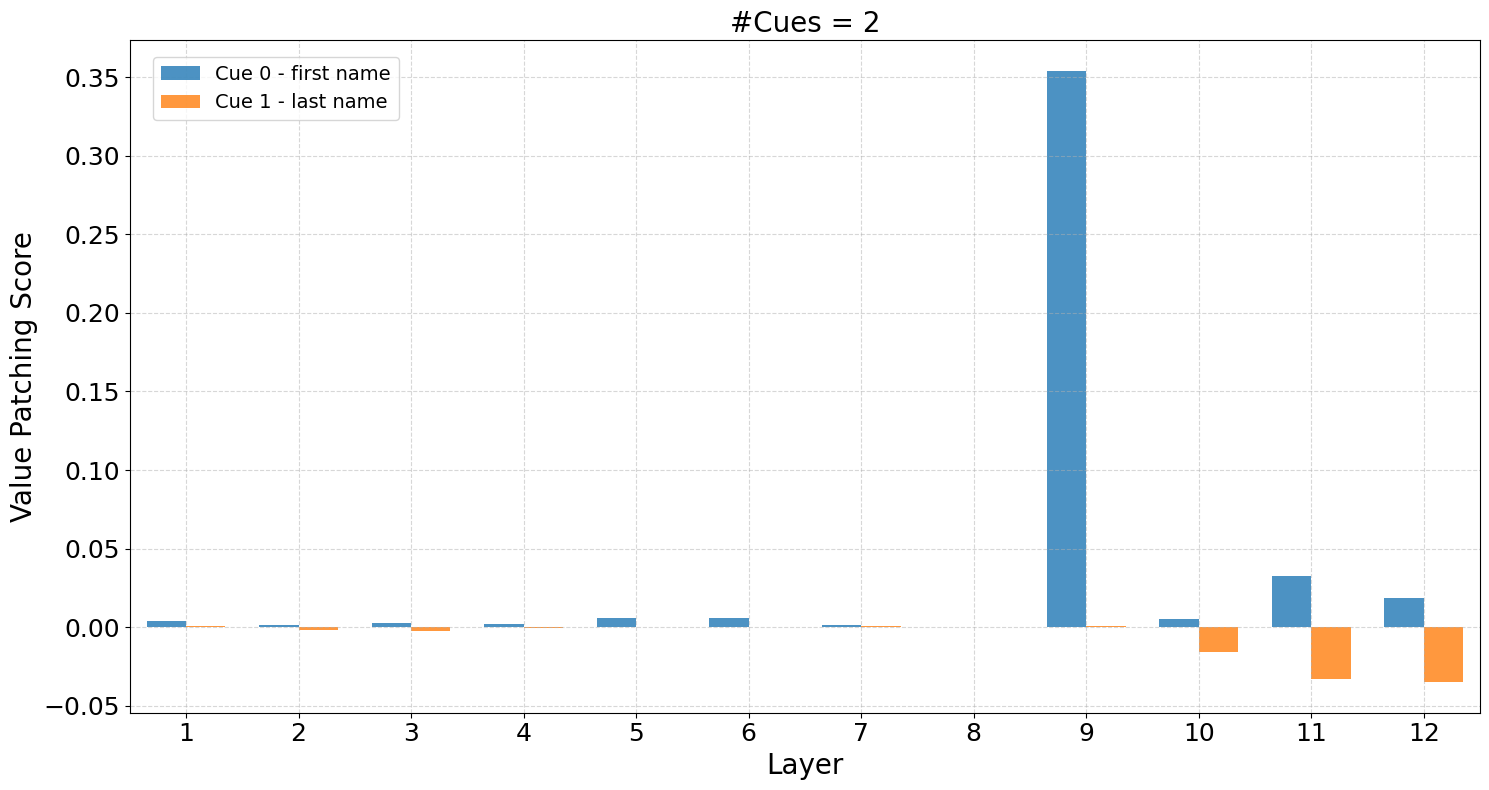

In [581]:
plot_vp(df_equal)

#### Examples with 4 cues

In [551]:
df = pd.read_pickle('../results_vp/bert-base-uncased_gender_agreement_4.pkl')
print('MASKED TEXT: ', df.iloc[0]['masked_text'])
print('CUE WORDS: ', df.iloc[0]['cue_words'])
print('TARGET WORD: ', df.iloc[0]['target_word'])
print('CLEAN TEXT: ', tokenizer.decode(df.iloc[0]['input_ids']))
print('CORRUPT TEXT: ', tokenizer.decode(df.iloc[0]['input_ids_corrupt']))
print('MODEL CLEAN PREDICTION: ', df.iloc[0]['model_top1_clean_prediction'])
print('MODEL CORRUPT PREDICTION: ', df.iloc[0]['model_top1_corrupt_prediction'])
print('DATAFRAME #ROWS: ', df.shape[0])

MASKED TEXT:  andy pyle is an english bass guitarist . he played with the kinks from 1976 -- 1978 . prior to that , he was in blodwyn pig and savoy brown . later , [MASK] played with wishbone ash .
CUE WORDS:  ['andy|0|4', 'pyle|5|9', 'he|41|43', 'he|102|104']
TARGET WORD:  he
CLEAN TEXT:  [CLS] andy pyle is an english bass guitarist. he played with the kinks from 1976 - - 1978. prior to that, he was in blodwyn pig and savoy brown. later, [MASK] played with wishbone ash. [SEP]
CORRUPT TEXT:  [CLS] amy willinsky is an english bass guitarist. she played with the kinks from 1976 - - 1978. prior to that, she was in blodwyn pig and savoy brown. later, [MASK] played with wishbone ash. [SEP]
MODEL CLEAN PREDICTION:  he
MODEL CORRUPT PREDICTION:  she
DATAFRAME #ROWS:  193


In [552]:
# investigating examples with correct model prediction
equality_condition = (df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower()) | (' '+df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower())
df_equal = df.loc[equality_condition]

keep_idxes = []
for i in range(len(df_equal)):
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'he' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'she':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'she' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'he':
        keep_idxes.append(i)
        
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'his' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'her':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'her' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'his':
        keep_idxes.append(i)

    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'him' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'hers':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'hers' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'him':
        keep_idxes.append(i)

    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'himself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'herself':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'herself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'himself':
        keep_idxes.append(i)

df_equal = df_equal.iloc[keep_idxes]

print('DATAFRAME #ROWS: ', df_equal.shape[0])
print('ACCURACY: ', df_equal.shape[0]/df.shape[0] * 100, '%')

DATAFRAME #ROWS:  111
ACCURACY:  57.51295336787565 %


In [553]:
# add cue words vp scores
df_equal['cueWordsVp_all_layersAndPos'] = df_equal.apply(
        lambda row: extract_cueWords_vp(row['vp_all_layersAndPos'], row['cues_tokenIdxes']), 
        axis=1
    )

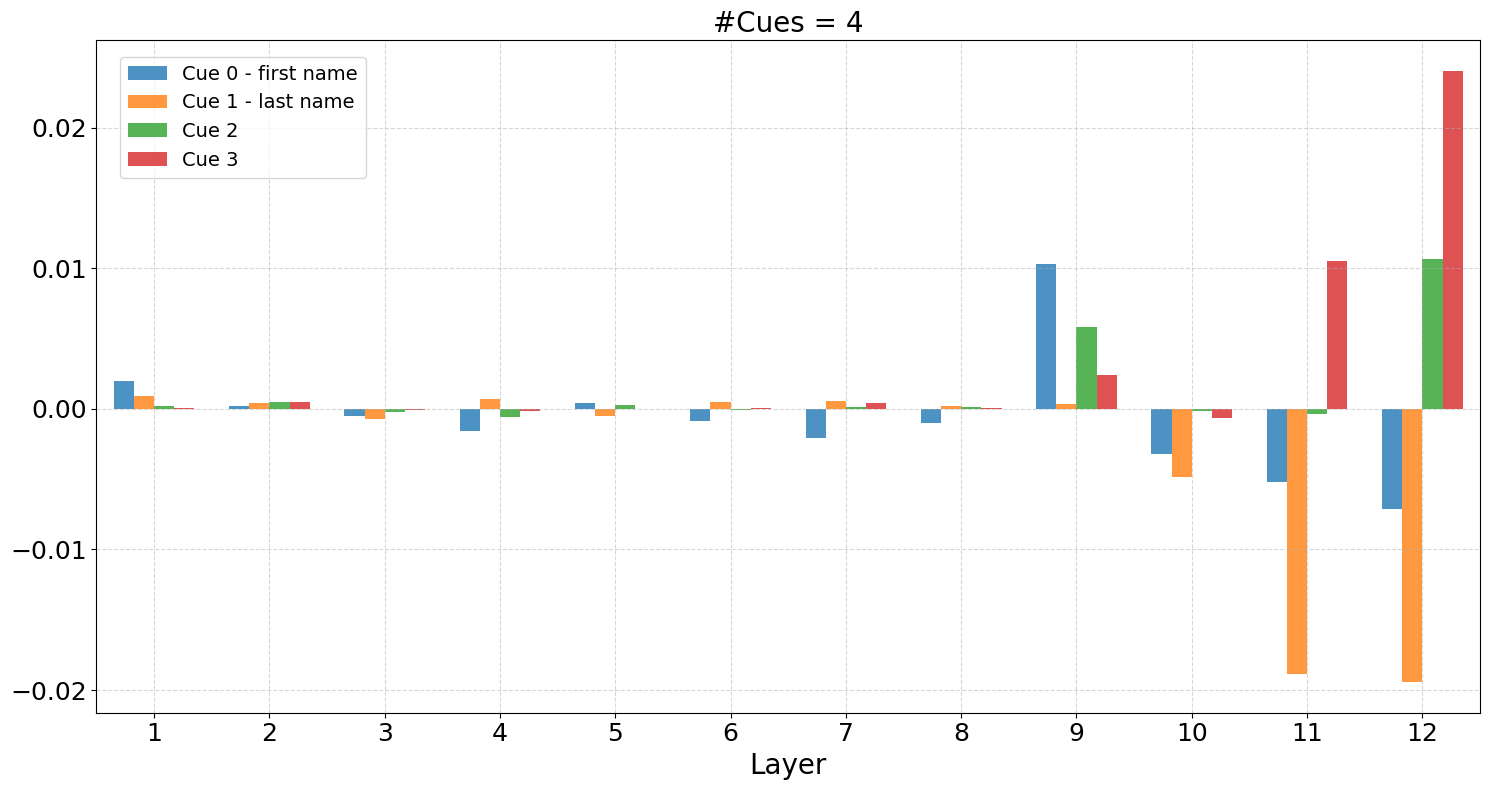

In [554]:
plot_vp(df_equal)

#### Examples with 6 cues

In [365]:
df = pd.read_pickle('../results_vp/bert-base-uncased_gender_agreement_6.pkl')
print('MASKED TEXT: ', df.iloc[0]['masked_text'])
print('CUE WORDS: ', df.iloc[0]['cue_words'])
print('TARGET WORD: ', df.iloc[0]['target_word'])
print('CLEAN TEXT: ', tokenizer.decode(df.iloc[0]['input_ids']))
print('CORRUPT TEXT: ', tokenizer.decode(df.iloc[0]['input_ids_corrupt']))
print('MODEL CLEAN PREDICTION: ', df.iloc[0]['model_top1_clean_prediction'])
print('MODEL CORRUPT PREDICTION: ', df.iloc[0]['model_top1_corrupt_prediction'])
print('DATAFRAME #ROWS: ', df.shape[0])

MASKED TEXT:  marilyn livingstone is a scottish labour co-operative politician , who served as the member of the scottish parliament for kirkcaldy constituency from 1999-2011 . before her election in 1999 she was the head of the business school at fife college . she was also a councillor on kirkcaldy district council and fife council . she won re-election from the kirkcaldy constituency in the 2003 and 2007 elections , but lost [MASK] seat in the 2011 election to the scottish national party 's david torrance , by 182 votes .
CUE WORDS:  ['marilyn|0|7', 'livingstone|8|19', 'her|170|173', 'she|191|194', 'she|249|252', 'she|324|327']
TARGET WORD:  her
CLEAN TEXT:  [CLS] marilyn livingstone is a scottish labour co - operative politician, who served as the member of the scottish parliament for kirkcaldy constituency from 1999 - 2011. before her election in 1999 she was the head of the business school at fife college. she was also a councillor on kirkcaldy district council and fife council. 

In [366]:
# investigating examples with correct model prediction
equality_condition = (df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower()) | (' '+df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower())
df_equal = df.loc[equality_condition]

keep_idxes = []
for i in range(len(df_equal)):
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'he' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'she':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'she' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'he':
        keep_idxes.append(i)
        
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'his' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'her':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'her' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'his':
        keep_idxes.append(i)

    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'him' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'hers':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'hers' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'him':
        keep_idxes.append(i)

    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'himself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'herself':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'herself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'himself':
        keep_idxes.append(i)

df_equal = df_equal.iloc[keep_idxes]

print('DATAFRAME #ROWS: ', df_equal.shape[0])
print('ACCURACY: ', df_equal.shape[0]/df.shape[0] * 100, '%')

DATAFRAME #ROWS:  118
ACCURACY:  67.04545454545455 %


In [367]:
# add cue words vp scores
df_equal['cueWordsVp_all_layersAndPos'] = df_equal.apply(
        lambda row: extract_cueWords_vp(row['vp_all_layersAndPos'], row['cues_tokenIdxes']), 
        axis=1
    )

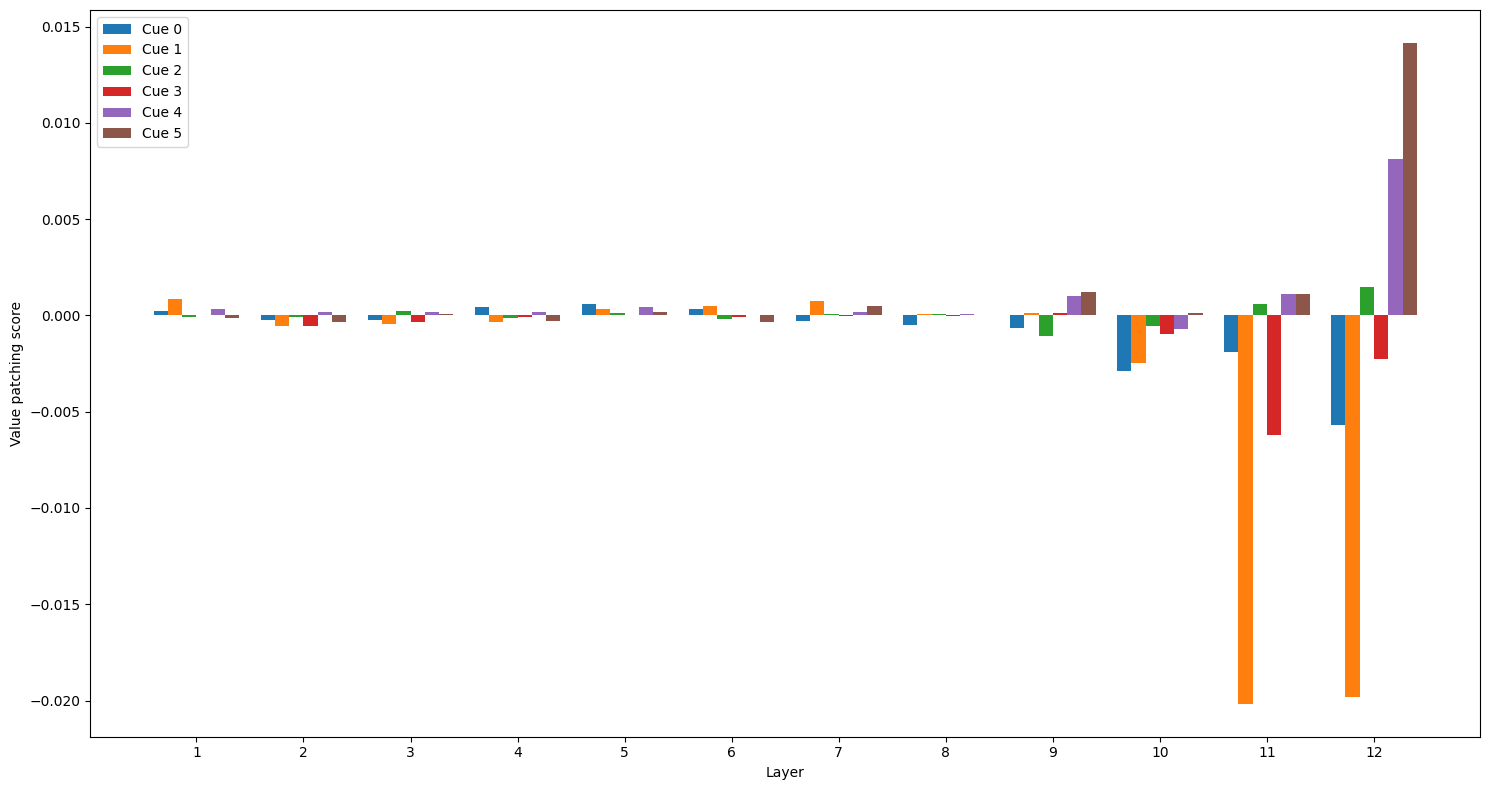

In [369]:
plot_vp(df_equal)

### with fine-tuning

#### Examples with 2 cues

In [370]:
df = pd.read_pickle('../results_vp/finetuned-bert_gender_agreement_2.pkl')
print('MASKED TEXT: ', df.iloc[0]['masked_text'])
print('CUE WORDS: ', df.iloc[0]['cue_words'])
print('TARGET WORD: ', df.iloc[0]['target_word'])
print('CLEAN TEXT: ', tokenizer.decode(df.iloc[0]['input_ids']))
print('CORRUPT TEXT: ', tokenizer.decode(df.iloc[0]['input_ids_corrupt']))
print('MODEL CLEAN PREDICTION: ', df.iloc[0]['model_top1_clean_prediction'])
print('MODEL CORRUPT PREDICTION: ', df.iloc[0]['model_top1_corrupt_prediction'])
print('DATAFRAME #ROWS: ', df.shape[0])

MASKED TEXT:  margaret becker is an american christian rock singer , guitarist , and songwriter . [MASK] has had twenty-one no. 1 christian radio hits , won four dove awards , and been nominated for four grammy awards .
CUE WORDS:  ['margaret|0|8', 'becker|9|15']
TARGET WORD:  she
CLEAN TEXT:  [CLS] margaret becker is an american christian rock singer, guitarist, and songwriter. [MASK] has had twenty - one no. 1 christian radio hits, won four dove awards, and been nominated for four grammy awards. [SEP]
CORRUPT TEXT:  [CLS] bob walker is an american christian rock singer, guitarist, and songwriter. [MASK] has had twenty - one no. 1 christian radio hits, won four dove awards, and been nominated for four grammy awards. [SEP]
MODEL CLEAN PREDICTION:  she
MODEL CORRUPT PREDICTION:  he
DATAFRAME #ROWS:  190


In [371]:
# investigating examples with correct model prediction
equality_condition = (df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower()) | (' '+df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower())
df_equal = df.loc[equality_condition]

keep_idxes = []
for i in range(len(df_equal)):
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'he' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'she':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'she' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'he':
        keep_idxes.append(i)
        
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'his' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'her':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'her' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'his':
        keep_idxes.append(i)

    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'him' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'hers':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'hers' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'him':
        keep_idxes.append(i)

    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'himself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'herself':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'herself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'himself':
        keep_idxes.append(i)

df_equal = df_equal.iloc[keep_idxes]

print('DATAFRAME #ROWS: ', df_equal.shape[0])
print('ACCURACY: ', df_equal.shape[0]/df.shape[0] * 100, '%')

DATAFRAME #ROWS:  166
ACCURACY:  87.36842105263159 %


In [372]:
# add cue words vp scores
df_equal['cueWordsVp_all_layersAndPos'] = df_equal.apply(
        lambda row: extract_cueWords_vp(row['vp_all_layersAndPos'], row['cues_tokenIdxes']), 
        axis=1
    )

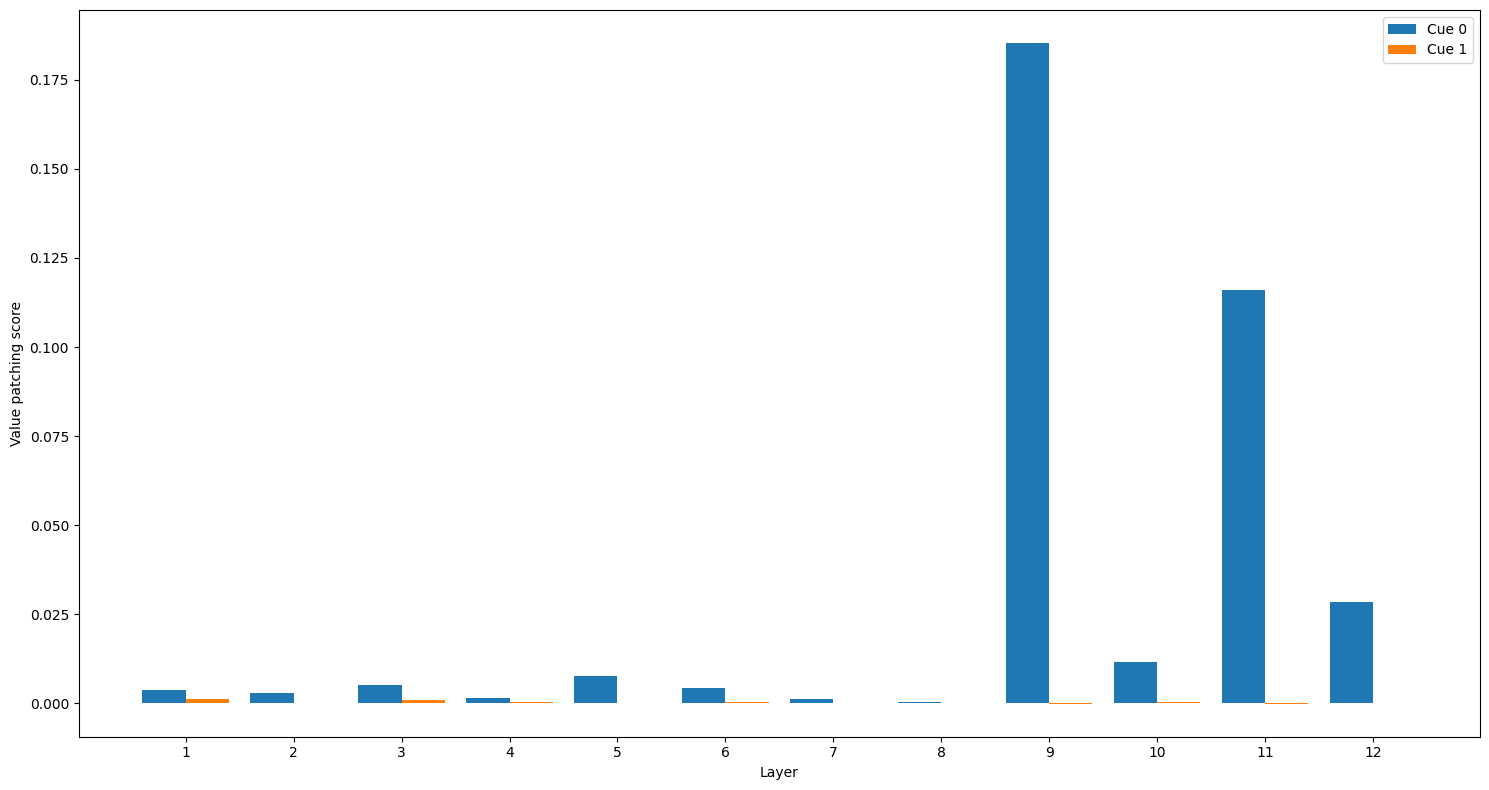

In [373]:
plot_vp(df_equal)

#### Examples with 4 cues

In [601]:
df = pd.read_pickle('../results_vp/finetuned-bert_gender_agreement_4.pkl')
print('MASKED TEXT: ', df.iloc[0]['masked_text'])
print('CUE WORDS: ', df.iloc[0]['cue_words'])
print('TARGET WORD: ', df.iloc[0]['target_word'])
print('CLEAN TEXT: ', tokenizer.decode(df.iloc[0]['input_ids']))
print('CORRUPT TEXT: ', tokenizer.decode(df.iloc[0]['input_ids_corrupt']))
print('MODEL CLEAN PREDICTION: ', df.iloc[0]['model_top1_clean_prediction'])
print('MODEL CORRUPT PREDICTION: ', df.iloc[0]['model_top1_corrupt_prediction'])
print('DATAFRAME #ROWS: ', df.shape[0])

MASKED TEXT:  andy pyle is an english bass guitarist . he played with the kinks from 1976 -- 1978 . prior to that , he was in blodwyn pig and savoy brown . later , [MASK] played with wishbone ash .
CUE WORDS:  ['andy|0|4', 'pyle|5|9', 'he|41|43', 'he|102|104']
TARGET WORD:  he
CLEAN TEXT:  [CLS] andy pyle is an english bass guitarist. he played with the kinks from 1976 - - 1978. prior to that, he was in blodwyn pig and savoy brown. later, [MASK] played with wishbone ash. [SEP]
CORRUPT TEXT:  [CLS] amy willinsky is an english bass guitarist. she played with the kinks from 1976 - - 1978. prior to that, she was in blodwyn pig and savoy brown. later, [MASK] played with wishbone ash. [SEP]
MODEL CLEAN PREDICTION:  he
MODEL CORRUPT PREDICTION:  she
DATAFRAME #ROWS:  193


In [490]:
# investigating examples with correct model prediction
equality_condition = (df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower()) | (' '+df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower())
df_equal = df.loc[equality_condition]

keep_idxes = []
for i in range(len(df_equal)):
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'he' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'she':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'she' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'he':
        keep_idxes.append(i)
        
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'his' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'her':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'her' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'his':
        keep_idxes.append(i)

    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'him' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'hers':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'hers' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'him':
        keep_idxes.append(i)

    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'himself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'herself':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'herself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'himself':
        keep_idxes.append(i)

df_equal = df_equal.iloc[keep_idxes]

print('DATAFRAME #ROWS: ', df_equal.shape[0])
print('ACCURACY: ', df_equal.shape[0]/df.shape[0] * 100, '%')

DATAFRAME #ROWS:  177
ACCURACY:  91.70984455958549 %


In [129]:
# add cue words vp scores
df_equal['cueWordsVp_all_layersAndPos'] = df_equal.apply(
        lambda row: extract_cueWords_vp(row['vp_all_layersAndPos'], row['cues_tokenIdxes']), 
        axis=1
    )

In [486]:
df.iloc[idx]['masked_text']

'leibu levin has been a romanian jewish narrator of yiddish literature , singer and composer , having his own work written in yiddish . during his last years , [MASK] emigrated to israel .'

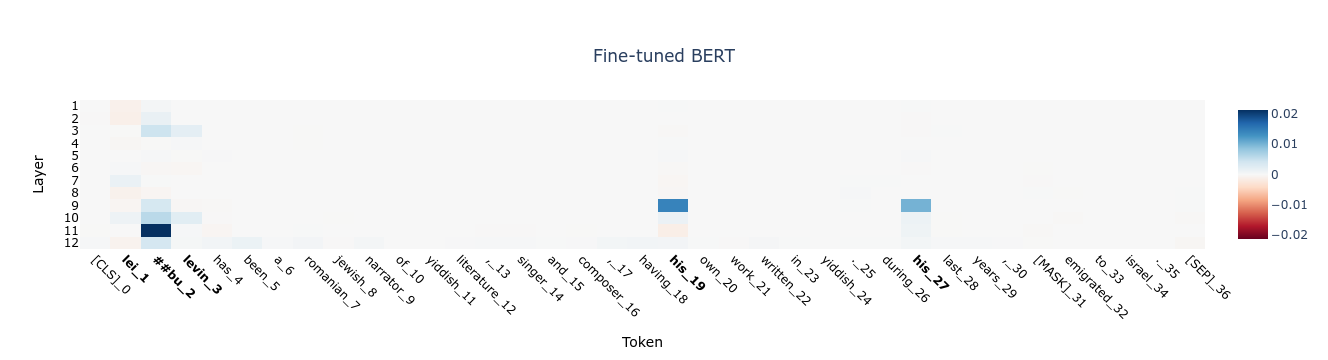

In [602]:
# plot a sample
for i in range(len(df)):
    if 'leibu levin' in df.iloc[i]['masked_text']:
        idx = i


token_labels = [f"{tokenizer.decode(token)}_{index}" for index, token in enumerate(df.iloc[idx]['input_ids'])]
bold_indices = [1, 2, 3, 19, 27] 
imshow(
    df.iloc[idx]['vp_all_layersAndPos'], 
    x=token_labels,  # Changed from x to y
    yaxis="Layer",  # Swapped xaxis and yaxis
    xaxis="Token", 
    title="Fine-tuned BERT", 
    file_name="finetuned-BERT_vpSample.pdf",
    bold_indices=bold_indices
)

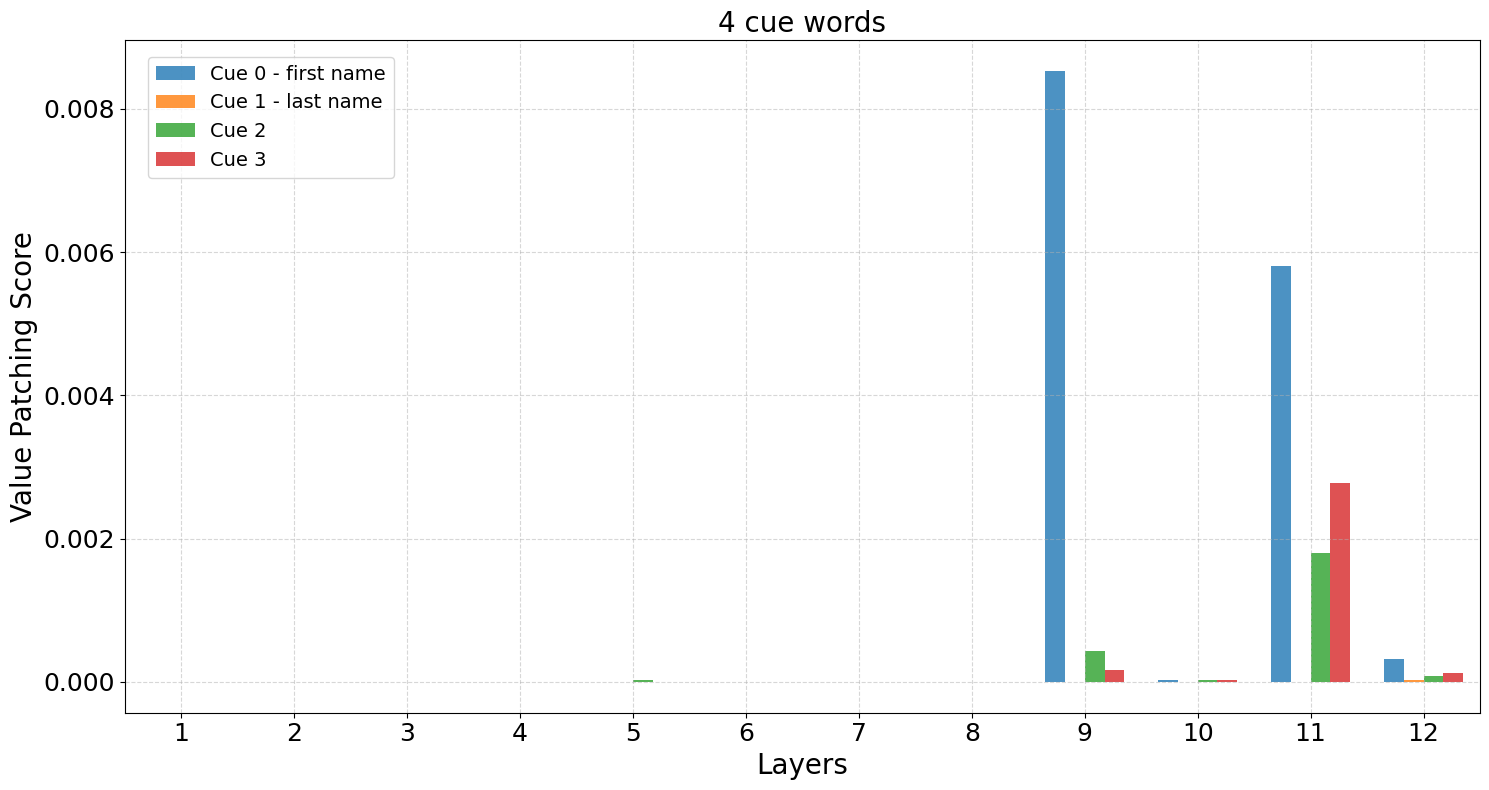

In [93]:
plot_vp(df_equal)

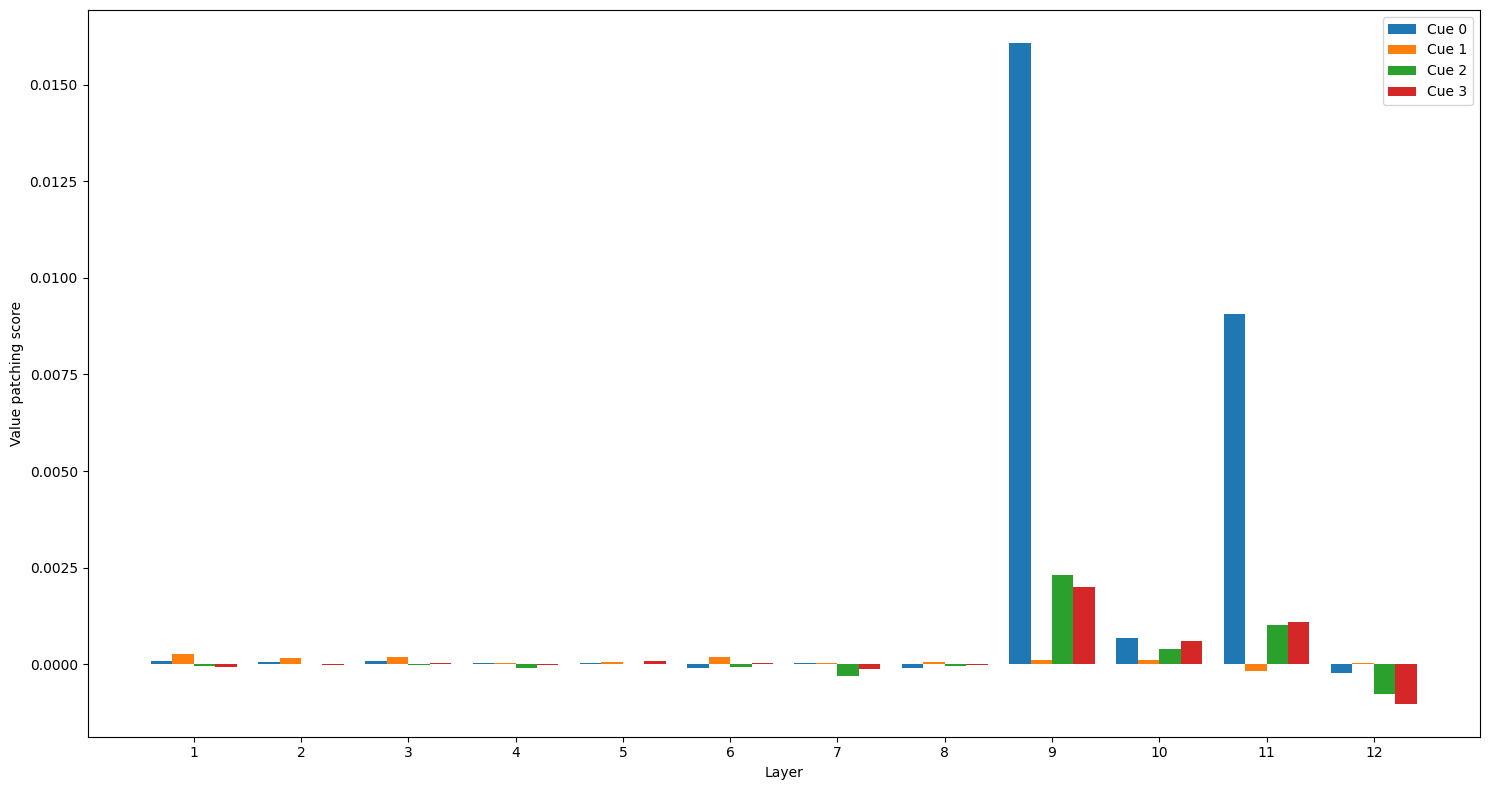

In [377]:
plot_vp(df_equal)

#### Examples with 6 cues

In [122]:
df = pd.read_pickle('../results_vp/finetuned-bert_gender_agreement_6.pkl')
print('MASKED TEXT: ', df.iloc[0]['masked_text'])
print('CUE WORDS: ', df.iloc[0]['cue_words'])
print('TARGET WORD: ', df.iloc[0]['target_word'])
print('CLEAN TEXT: ', tokenizer.decode(df.iloc[0]['input_ids']))
print('CORRUPT TEXT: ', tokenizer.decode(df.iloc[0]['input_ids_corrupt']))
print('MODEL CLEAN PREDICTION: ', df.iloc[0]['model_top1_clean_prediction'])
print('MODEL CORRUPT PREDICTION: ', df.iloc[0]['model_top1_corrupt_prediction'])
print('DATAFRAME #ROWS: ', df.shape[0])

MASKED TEXT:  marilyn livingstone is a scottish labour co-operative politician , who served as the member of the scottish parliament for kirkcaldy constituency from 1999-2011 . before her election in 1999 she was the head of the business school at fife college . she was also a councillor on kirkcaldy district council and fife council . she won re-election from the kirkcaldy constituency in the 2003 and 2007 elections , but lost [MASK] seat in the 2011 election to the scottish national party 's david torrance , by 182 votes .
CUE WORDS:  ['marilyn|0|7', 'livingstone|8|19', 'her|170|173', 'she|191|194', 'she|249|252', 'she|324|327']
TARGET WORD:  her
CLEAN TEXT:  [CLS] marilyn livingstone is a scottish labour co - operative politician, who served as the member of the scottish parliament for kirkcaldy constituency from 1999 - 2011. before her election in 1999 she was the head of the business school at fife college. she was also a councillor on kirkcaldy district council and fife council. 

In [123]:
# investigating examples with correct model prediction
equality_condition = (df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower()) | (' '+df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower())
df_equal = df.loc[equality_condition]

keep_idxes = []
for i in range(len(df_equal)):
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'he' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'she':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'she' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'he':
        keep_idxes.append(i)
        
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'his' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'her':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'her' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'his':
        keep_idxes.append(i)

    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'him' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'hers':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'hers' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'him':
        keep_idxes.append(i)

    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'himself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'herself':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'herself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'himself':
        keep_idxes.append(i)

df_equal = df_equal.iloc[keep_idxes]

print('DATAFRAME #ROWS: ', df_equal.shape[0])
print('ACCURACY: ', df_equal.shape[0]/df.shape[0] * 100, '%')

DATAFRAME #ROWS:  157
ACCURACY:  89.20454545454545 %


In [124]:
# add cue words vp scores
df_equal['cueWordsVp_all_layersAndPos'] = df_equal.apply(
        lambda row: extract_cueWords_vp(row['vp_all_layersAndPos'], row['cues_tokenIdxes']), 
        axis=1
    )

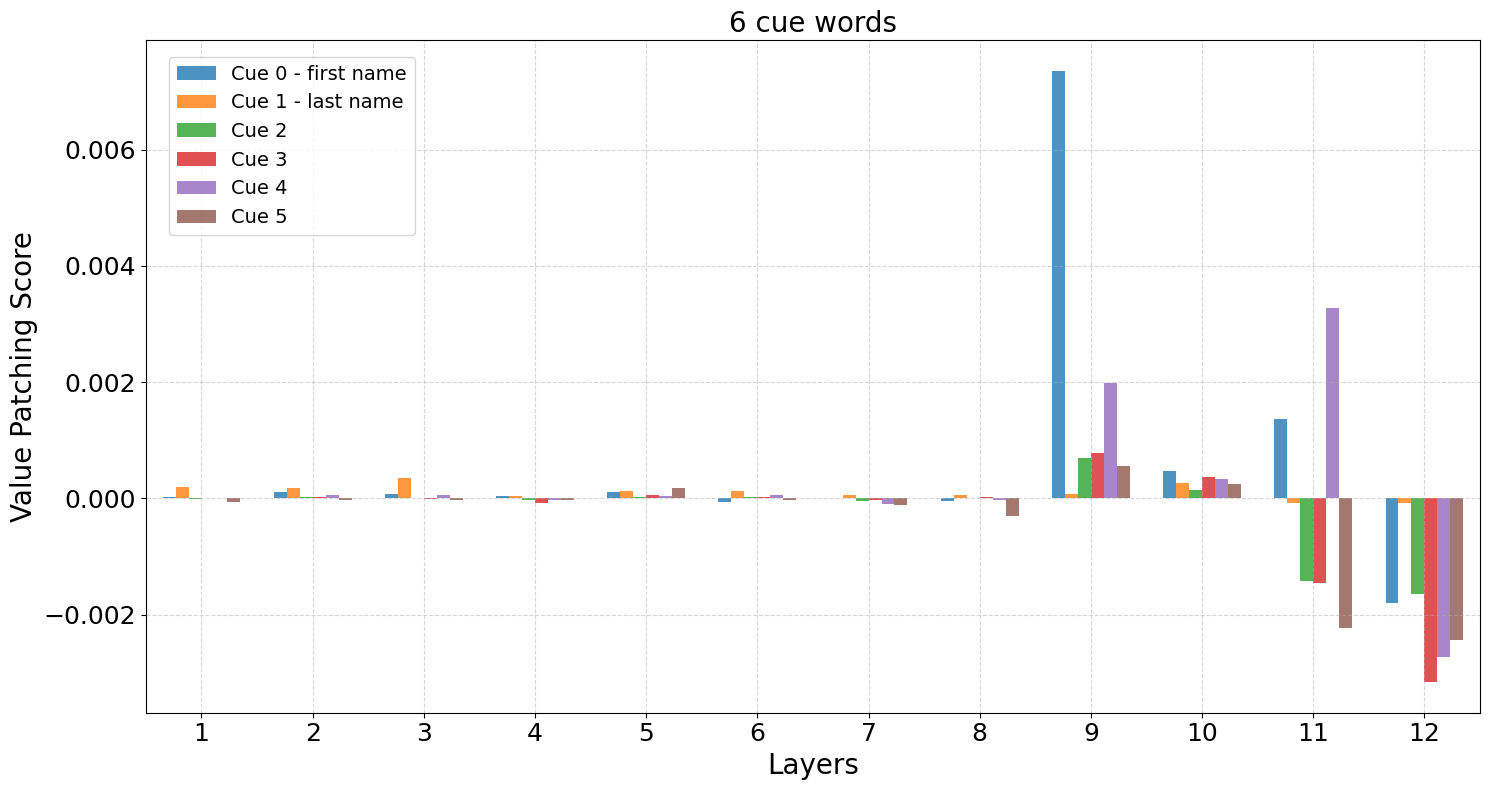

In [117]:
plot_vp(df_equal)

## GPT2

### without fine-tuning

#### Examples with 2 cues

In [603]:
tokenizer = AutoTokenizer.from_pretrained('gpt2')

df = pd.read_pickle('../results_vp/gpt2_gender_agreement_2.pkl')
print('MASKED TEXT: ', df.iloc[0]['masked_text'])
print('CUE WORDS: ', df.iloc[0]['cue_words'])
print('TARGET WORD: ', df.iloc[0]['target_word'])
print('CLEAN TEXT: ', tokenizer.decode(df.iloc[0]['input_ids']))
print('CORRUPT TEXT: ', tokenizer.decode(df.iloc[0]['input_ids_corrupt']))
print('MODEL CLEAN PREDICTION: ', df.iloc[0]['model_top1_clean_prediction'])
print('MODEL CORRUPT PREDICTION: ', df.iloc[0]['model_top1_corrupt_prediction'])
print('DATAFRAME #ROWS: ', df.shape[0])

MASKED TEXT:  margaret becker is an american christian rock singer , guitarist , and songwriter .
CUE WORDS:  ['margaret|0|8', 'becker|9|15']
TARGET WORD:  she
CLEAN TEXT:  margaret becker is an american christian rock singer, guitarist, and songwriter.
CORRUPT TEXT:   aron willinsky is an american christian rock singer, guitarist, and songwriter.
MODEL CLEAN PREDICTION:   He
MODEL CORRUPT PREDICTION:   He
DATAFRAME #ROWS:  124


In [73]:
# investigating examples with correct model prediction
equality_condition = (df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower()) | (' '+df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower())
df_equal = df.loc[equality_condition]

keep_idxes = []
for i in range(len(df_equal)):
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'he' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'she':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'she' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'he':
        keep_idxes.append(i)
        
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'his' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'her':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'her' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'his':
        keep_idxes.append(i)

    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'him' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'hers':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'hers' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'him':
        keep_idxes.append(i)

    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'himself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'herself':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'herself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'himself':
        keep_idxes.append(i)

df_equal = df_equal.iloc[keep_idxes]

print('DATAFRAME #ROWS: ', df_equal.shape[0])
print('ACCURACY: ', df_equal.shape[0]/df.shape[0] * 100, '%')

DATAFRAME #ROWS:  7
ACCURACY:  5.64516129032258 %


In [74]:
# add cue words vp scores
df_equal['cueWordsVp_all_layersAndPos'] = df_equal.apply(
        lambda row: extract_cueWords_vp(row['vp_all_layersAndPos'], row['cues_tokenIdxes']), 
        axis=1
    )

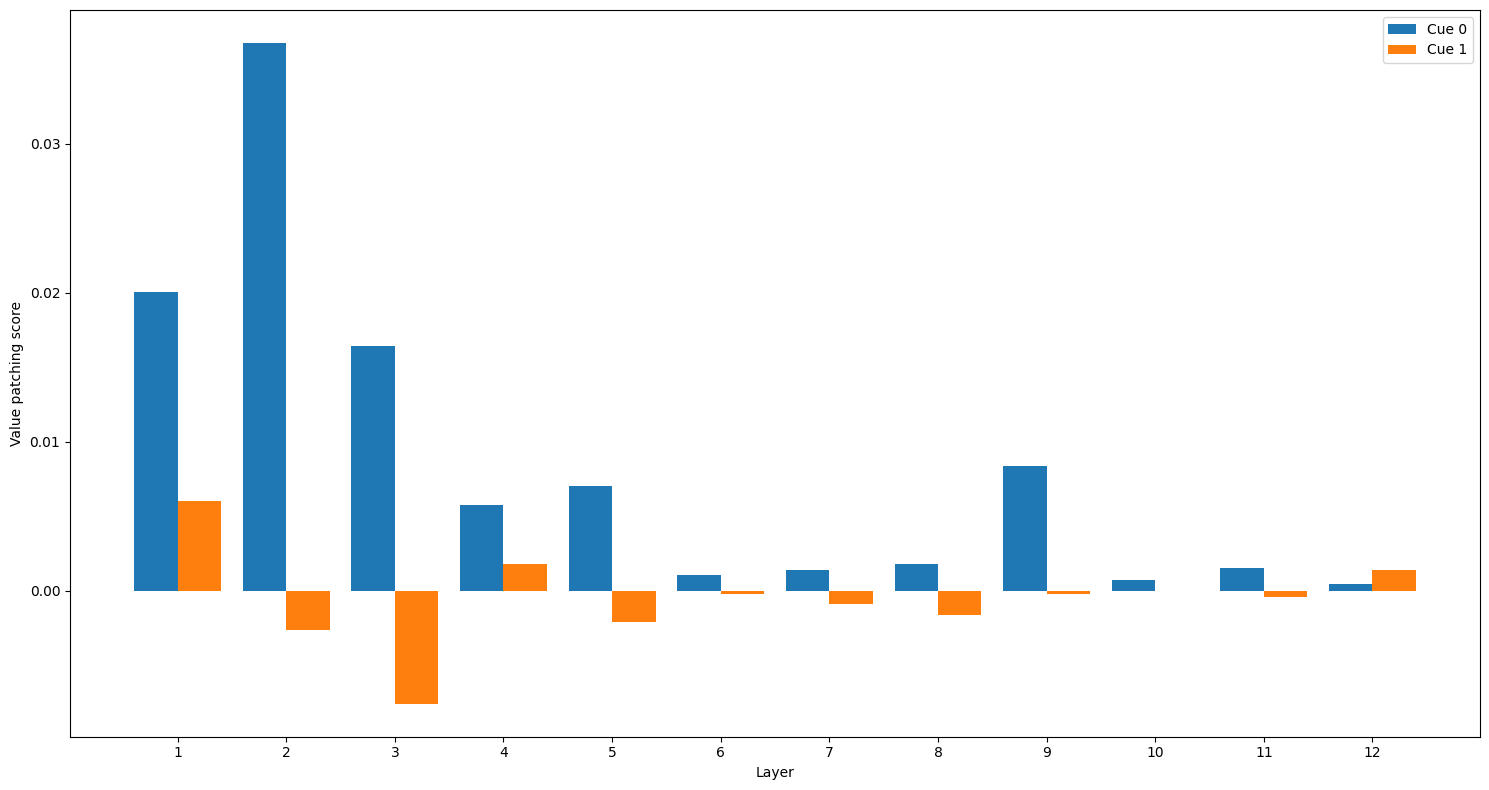

In [385]:
plot_vp(df_equal)

#### Examples with 4 cues

In [386]:
df = pd.read_pickle('../results_vp/gpt2_gender_agreement_4.pkl')
print('MASKED TEXT: ', df.iloc[0]['masked_text'])
print('CUE WORDS: ', df.iloc[0]['cue_words'])
print('TARGET WORD: ', df.iloc[0]['target_word'])
print('CLEAN TEXT: ', tokenizer.decode(df.iloc[0]['input_ids']))
print('CORRUPT TEXT: ', tokenizer.decode(df.iloc[0]['input_ids_corrupt']))
print('MODEL CLEAN PREDICTION: ', df.iloc[0]['model_top1_clean_prediction'])
print('MODEL CORRUPT PREDICTION: ', df.iloc[0]['model_top1_corrupt_prediction'])
print('DATAFRAME #ROWS: ', df.shape[0])

MASKED TEXT:  andy pyle is an english bass guitarist . he played with the kinks from 1976 -- 1978 . prior to that , he was in blodwyn pig and savoy brown . later ,
CUE WORDS:  ['andy|0|4', 'pyle|5|9', 'he|41|43', 'he|102|104']
TARGET WORD:  he
CLEAN TEXT:  andy pyle is an english bass guitarist. he played with the kinks from 1976 -- 1978. prior to that, he was in blodwyn pig and savoy brown. later,
CORRUPT TEXT:   amy willinsky is an english bass guitarist. she played with the kinks from 1976 -- 1978. prior to that, she was in blodwyn pig and savoy brown. later,
MODEL CLEAN PREDICTION:   he
MODEL CORRUPT PREDICTION:   she
DATAFRAME #ROWS:  123


In [387]:
# investigating examples with correct model prediction
equality_condition = (df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower()) | (' '+df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower())
df_equal = df.loc[equality_condition]

keep_idxes = []
for i in range(len(df_equal)):
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'he' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'she':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'she' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'he':
        keep_idxes.append(i)
        
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'his' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'her':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'her' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'his':
        keep_idxes.append(i)

    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'him' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'hers':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'hers' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'him':
        keep_idxes.append(i)

    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'himself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'herself':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'herself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'himself':
        keep_idxes.append(i)

df_equal = df_equal.iloc[keep_idxes]

print('DATAFRAME #ROWS: ', df_equal.shape[0])
print('ACCURACY: ', df_equal.shape[0]/df.shape[0] * 100, '%')

DATAFRAME #ROWS:  59
ACCURACY:  47.96747967479675 %


In [388]:
# add cue words vp scores
df_equal['cueWordsVp_all_layersAndPos'] = df_equal.apply(
        lambda row: extract_cueWords_vp(row['vp_all_layersAndPos'], row['cues_tokenIdxes']), 
        axis=1
    )

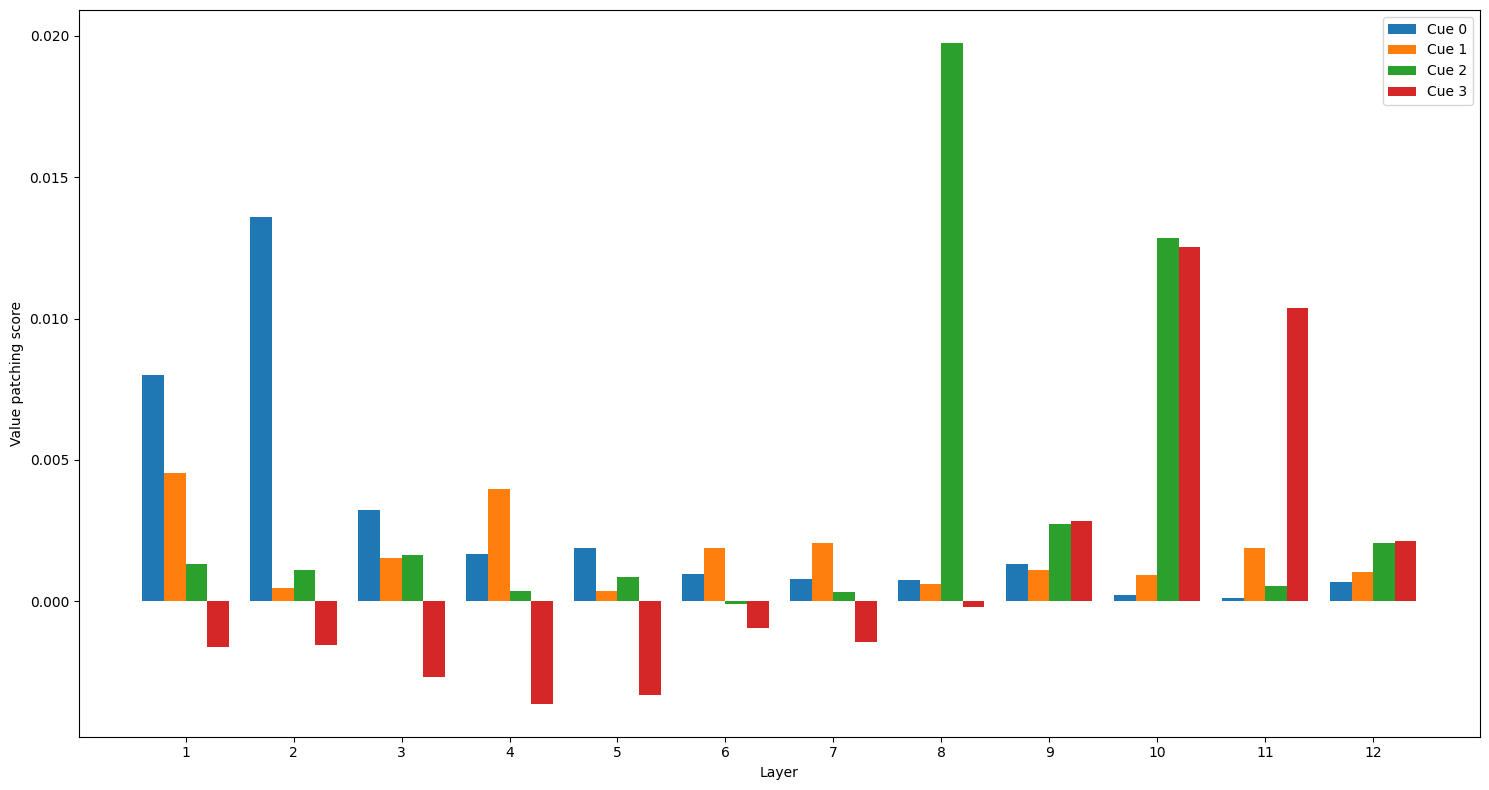

In [389]:
plot_vp(df_equal)

#### Examples with 6 cues

In [390]:
df = pd.read_pickle('../results_vp/gpt2_gender_agreement_6.pkl')
print('MASKED TEXT: ', df.iloc[0]['masked_text'])
print('CUE WORDS: ', df.iloc[0]['cue_words'])
print('TARGET WORD: ', df.iloc[0]['target_word'])
print('CLEAN TEXT: ', tokenizer.decode(df.iloc[0]['input_ids']))
print('CORRUPT TEXT: ', tokenizer.decode(df.iloc[0]['input_ids_corrupt']))
print('MODEL CLEAN PREDICTION: ', df.iloc[0]['model_top1_clean_prediction'])
print('MODEL CORRUPT PREDICTION: ', df.iloc[0]['model_top1_corrupt_prediction'])
print('DATAFRAME #ROWS: ', df.shape[0])

MASKED TEXT:  gary hughes is an english hard rock singer , songwriter and musician . apart from his work as a solo artist , gary hughes is the front man and main songwriter of hard rock/melodic rock band ten .
CUE WORDS:  ['gary|0|4', 'hughes|5|11', 'his|82|85', 'gary|110|114', 'hughes|115|121', 'man|135|138']
TARGET WORD:  he
CLEAN TEXT:  gary hughes is an english hard rock singer, songwriter and musician. apart from his work as a solo artist, gary hughes is the front man and main songwriter of hard rock/melodic rock band ten.
CORRUPT TEXT:   amy willinsky is an english hard rock singer, songwriter and musician. apart from her work as a solo artist, noora willinsky is the front woman and main songwriter of hard rock/melodic rock band ten.
MODEL CLEAN PREDICTION:   he
MODEL CORRUPT PREDICTION:   she
DATAFRAME #ROWS:  110


In [391]:
# investigating examples with correct model prediction
equality_condition = (df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower()) | (' '+df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower())
df_equal = df.loc[equality_condition]

keep_idxes = []
for i in range(len(df_equal)):
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'he' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'she':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'she' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'he':
        keep_idxes.append(i)
        
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'his' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'her':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'her' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'his':
        keep_idxes.append(i)

    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'him' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'hers':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'hers' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'him':
        keep_idxes.append(i)

    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'himself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'herself':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'herself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'himself':
        keep_idxes.append(i)

df_equal = df_equal.iloc[keep_idxes]

print('DATAFRAME #ROWS: ', df_equal.shape[0])
print('ACCURACY: ', df_equal.shape[0]/df.shape[0] * 100, '%')

DATAFRAME #ROWS:  38
ACCURACY:  34.54545454545455 %


In [392]:
# add cue words vp scores
df_equal['cueWordsVp_all_layersAndPos'] = df_equal.apply(
        lambda row: extract_cueWords_vp(row['vp_all_layersAndPos'], row['cues_tokenIdxes']), 
        axis=1
    )

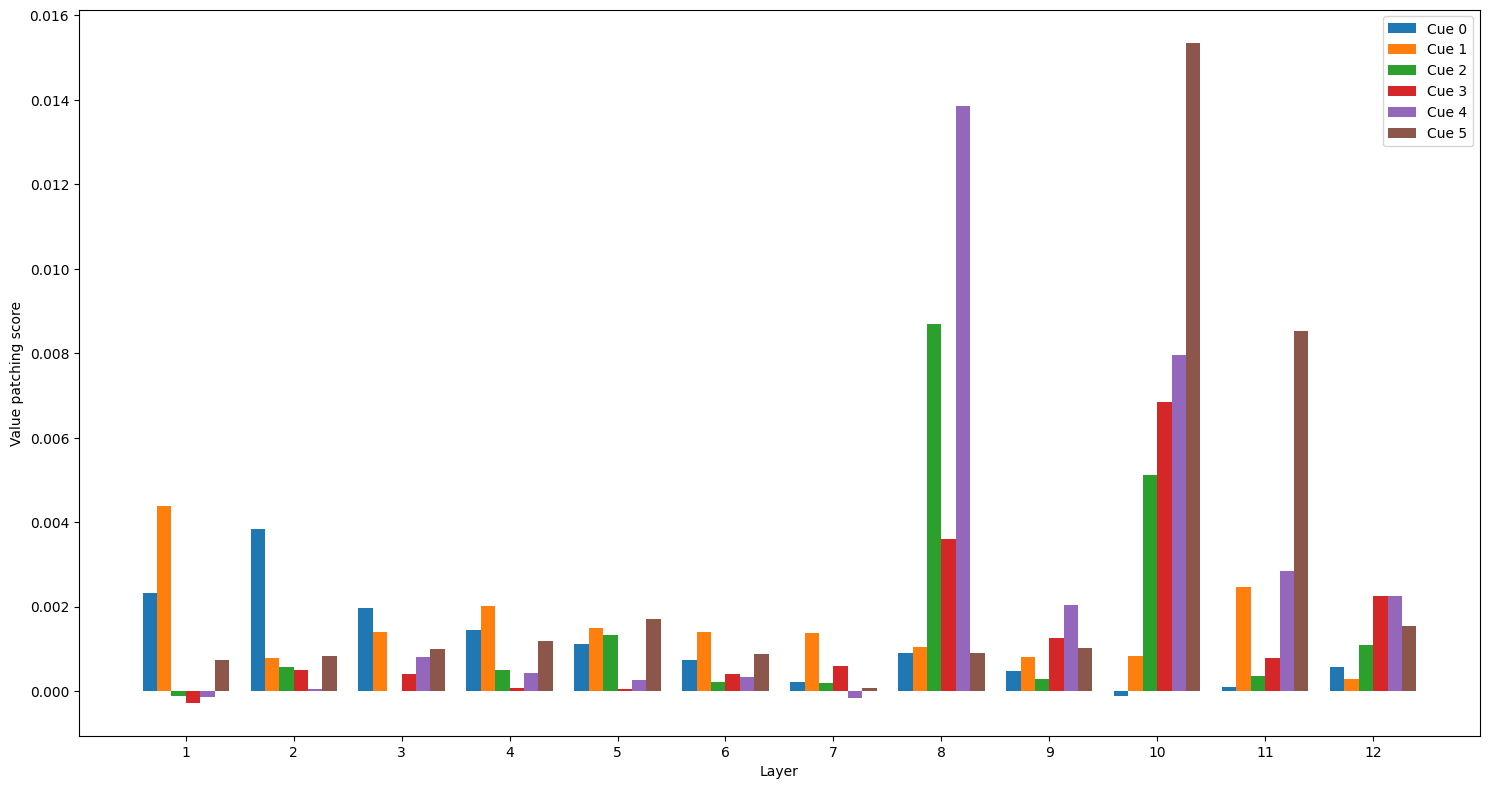

In [393]:
plot_vp(df_equal)

### with fine-tuning

#### Examples with 2 cues

In [492]:
df = pd.read_pickle('../results_vp/finetuned-gpt2_gender_agreement_2.pkl')
print('MASKED TEXT: ', df.iloc[0]['masked_text'])
print('CUE WORDS: ', df.iloc[0]['cue_words'])
print('TARGET WORD: ', df.iloc[0]['target_word'])
print('CLEAN TEXT: ', tokenizer.decode(df.iloc[0]['input_ids']))
print('CORRUPT TEXT: ', tokenizer.decode(df.iloc[0]['input_ids_corrupt']))
print('MODEL CLEAN PREDICTION: ', df.iloc[0]['model_top1_clean_prediction'])
print('MODEL CORRUPT PREDICTION: ', df.iloc[0]['model_top1_corrupt_prediction'])
print('DATAFRAME #ROWS: ', df.shape[0])

MASKED TEXT:  margaret becker is an american christian rock singer , guitarist , and songwriter .
CUE WORDS:  ['margaret|0|8', 'becker|9|15']
TARGET WORD:  she
CLEAN TEXT:  margaret becker is an american christian rock singer, guitarist, and songwriter.
CORRUPT TEXT:   aron willinsky is an american christian rock singer, guitarist, and songwriter.
MODEL CLEAN PREDICTION:   She
MODEL CORRUPT PREDICTION:   He
DATAFRAME #ROWS:  124


In [395]:
# investigating examples with correct model prediction
equality_condition = (df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower()) | (' '+df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower())
df_equal = df.loc[equality_condition]

keep_idxes = []
for i in range(len(df_equal)):
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'he' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'she':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'she' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'he':
        keep_idxes.append(i)
        
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'his' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'her':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'her' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'his':
        keep_idxes.append(i)

    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'him' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'hers':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'hers' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'him':
        keep_idxes.append(i)

    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'himself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'herself':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'herself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'himself':
        keep_idxes.append(i)

df_equal = df_equal.iloc[keep_idxes]

print('DATAFRAME #ROWS: ', df_equal.shape[0])
print('ACCURACY: ', df_equal.shape[0]/df.shape[0] * 100, '%')

DATAFRAME #ROWS:  58
ACCURACY:  46.774193548387096 %


In [396]:
# add cue words vp scores
df_equal['cueWordsVp_all_layersAndPos'] = df_equal.apply(
        lambda row: extract_cueWords_vp(row['vp_all_layersAndPos'], row['cues_tokenIdxes']), 
        axis=1
    )

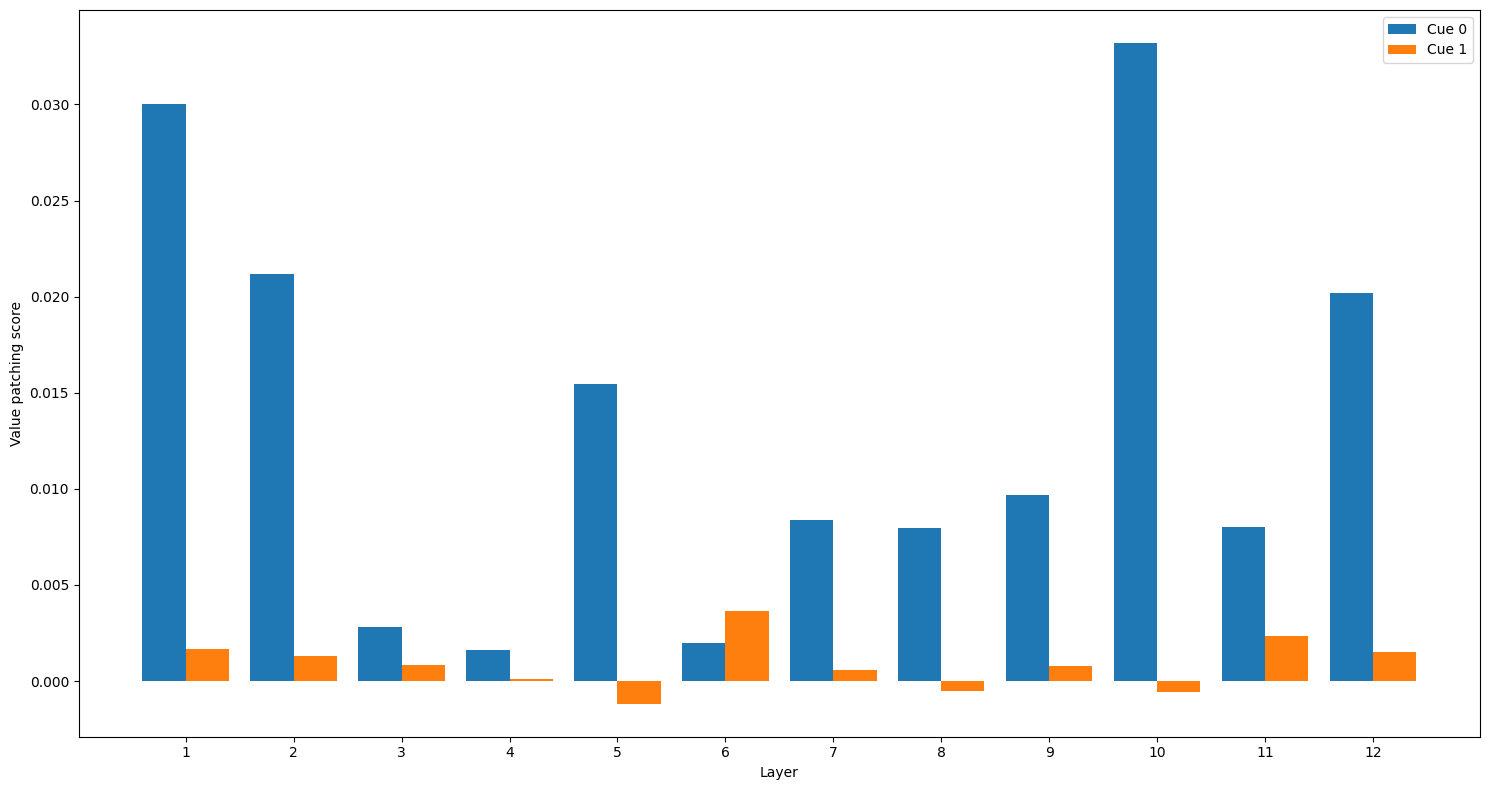

In [397]:
plot_vp(df_equal)

#### Examples with 4 cues

In [604]:
df = pd.read_pickle('../results_vp/finetuned-gpt2_gender_agreement_4.pkl')
print('MASKED TEXT: ', df.iloc[0]['masked_text'])
print('CUE WORDS: ', df.iloc[0]['cue_words'])
print('TARGET WORD: ', df.iloc[0]['target_word'])
print('CLEAN TEXT: ', tokenizer.decode(df.iloc[0]['input_ids']))
print('CORRUPT TEXT: ', tokenizer.decode(df.iloc[0]['input_ids_corrupt']))
print('MODEL CLEAN PREDICTION: ', df.iloc[0]['model_top1_clean_prediction'])
print('MODEL CORRUPT PREDICTION: ', df.iloc[0]['model_top1_corrupt_prediction'])
print('DATAFRAME #ROWS: ', df.shape[0])

MASKED TEXT:  andy pyle is an english bass guitarist . he played with the kinks from 1976 -- 1978 . prior to that , he was in blodwyn pig and savoy brown . later ,
CUE WORDS:  ['andy|0|4', 'pyle|5|9', 'he|41|43', 'he|102|104']
TARGET WORD:  he
CLEAN TEXT:  andy pyle is an english bass guitarist. he played with the kinks from 1976 -- 1978. prior to that, he was in blodwyn pig and savoy brown. later,
CORRUPT TEXT:   amy willinsky is an english bass guitarist. she played with the kinks from 1976 -- 1978. prior to that, she was in blodwyn pig and savoy brown. later,
MODEL CLEAN PREDICTION:   he
MODEL CORRUPT PREDICTION:   she
DATAFRAME #ROWS:  123


In [192]:
# investigating examples with correct model prediction
equality_condition = (df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower()) | (' '+df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower())
df_equal = df.loc[equality_condition]

keep_idxes = []
for i in range(len(df_equal)):
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'he' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'she':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'she' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'he':
        keep_idxes.append(i)
        
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'his' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'her':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'her' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'his':
        keep_idxes.append(i)

    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'him' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'hers':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'hers' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'him':
        keep_idxes.append(i)

    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'himself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'herself':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'herself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'himself':
        keep_idxes.append(i)

df_equal = df_equal.iloc[keep_idxes]

print('DATAFRAME #ROWS: ', df_equal.shape[0])
print('ACCURACY: ', df_equal.shape[0]/df.shape[0] * 100, '%')

DATAFRAME #ROWS:  86
ACCURACY:  69.91869918699187 %


In [97]:
# add cue words vp scores
df_equal['cueWordsVp_all_layersAndPos'] = df_equal.apply(
        lambda row: extract_cueWords_vp(row['vp_all_layersAndPos'], row['cues_tokenIdxes']), 
        axis=1
    )

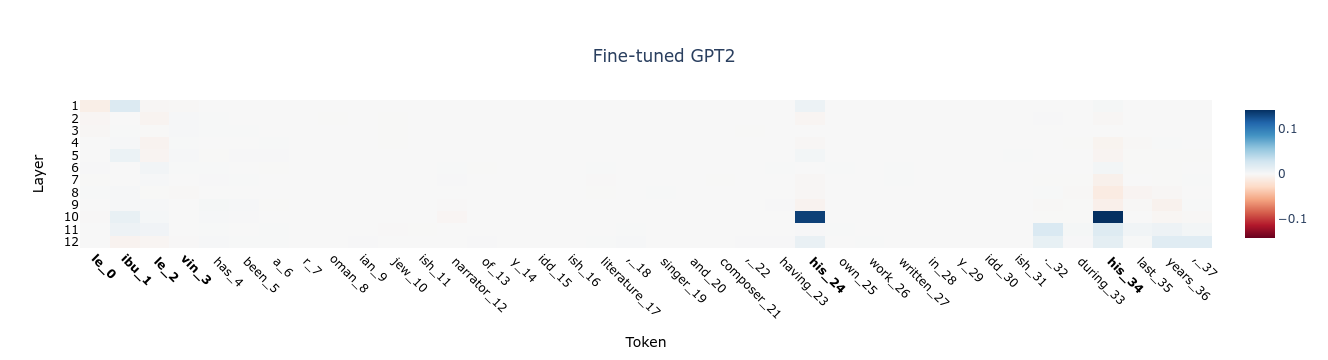

In [605]:
for i in range(len(df)):
    if 'leibu levin' in df.iloc[i]['masked_text']:
        idx = i
        

token_labels = [f"{tokenizer.decode(token)}_{index}" for index, token in enumerate(df.iloc[idx]['input_ids'])]

bold_indices = [0, 1, 2, 3, 24, 34] 

imshow(
    df.iloc[idx]['vp_all_layersAndPos'], 
    x=token_labels, 
    xaxis="Token", 
    yaxis="Layer", 
    title="Fine-tuned GPT2", 
    file_name="finetuned-GPT2_vpSample.pdf",
    bold_indices=bold_indices
)

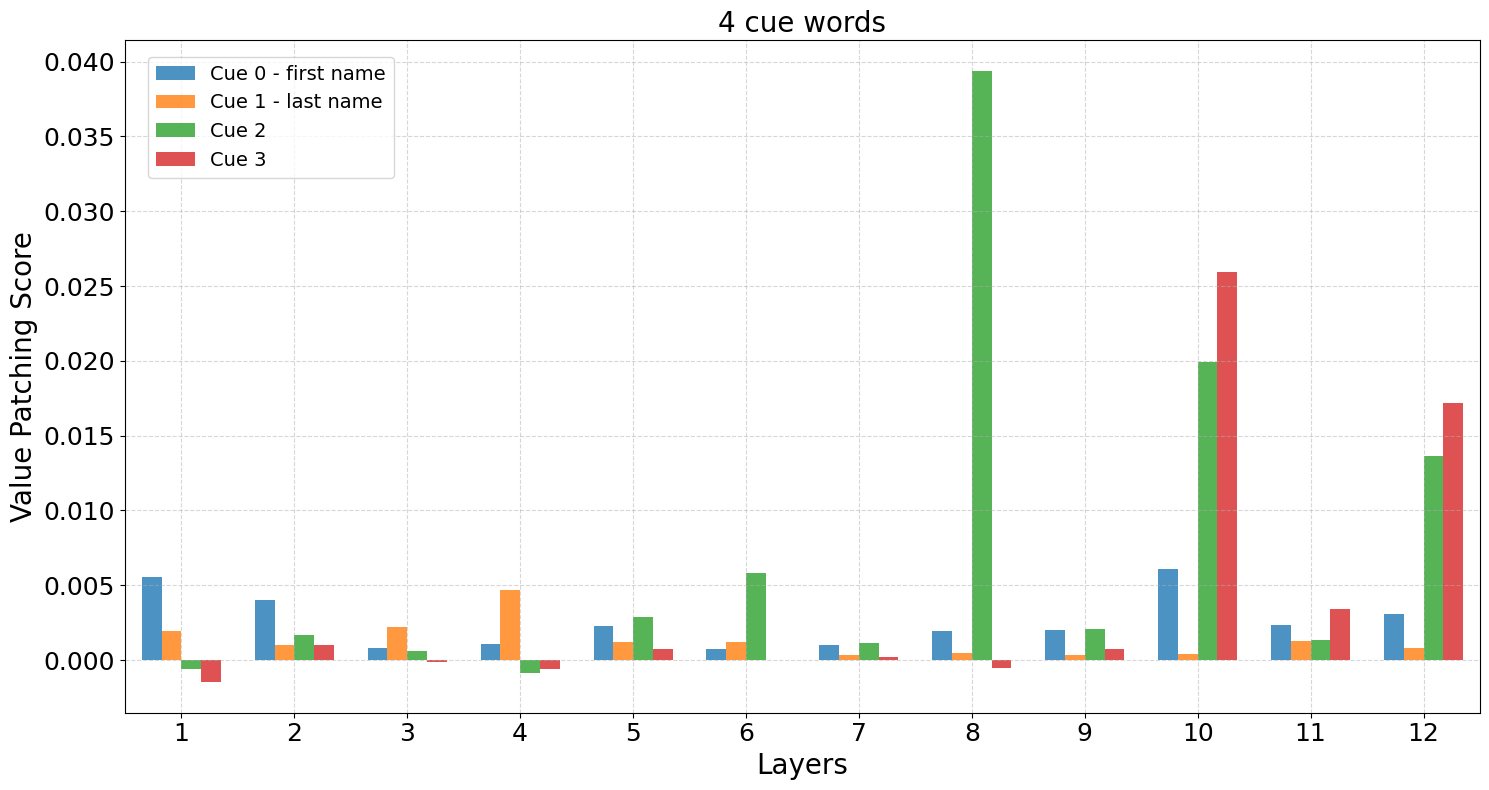

In [65]:
plot_vp(df_equal)

#### Examples with 6 cues

In [103]:
df = pd.read_pickle('../results_vp/finetuned-gpt2_gender_agreement_6.pkl')
print('MASKED TEXT: ', df.iloc[0]['masked_text'])
print('CUE WORDS: ', df.iloc[0]['cue_words'])
print('TARGET WORD: ', df.iloc[0]['target_word'])
print('CLEAN TEXT: ', tokenizer.decode(df.iloc[0]['input_ids']))
print('CORRUPT TEXT: ', tokenizer.decode(df.iloc[0]['input_ids_corrupt']))
print('MODEL CLEAN PREDICTION: ', df.iloc[0]['model_top1_clean_prediction'])
print('MODEL CORRUPT PREDICTION: ', df.iloc[0]['model_top1_corrupt_prediction'])
print('DATAFRAME #ROWS: ', df.shape[0])

MASKED TEXT:  gary hughes is an english hard rock singer , songwriter and musician . apart from his work as a solo artist , gary hughes is the front man and main songwriter of hard rock/melodic rock band ten .
CUE WORDS:  ['gary|0|4', 'hughes|5|11', 'his|82|85', 'gary|110|114', 'hughes|115|121', 'man|135|138']
TARGET WORD:  he
CLEAN TEXT:  gary hughes is an english hard rock singer, songwriter and musician. apart from his work as a solo artist, gary hughes is the front man and main songwriter of hard rock/melodic rock band ten.
CORRUPT TEXT:   amy willinsky is an english hard rock singer, songwriter and musician. apart from her work as a solo artist, noora willinsky is the front woman and main songwriter of hard rock/melodic rock band ten.
MODEL CLEAN PREDICTION:   He
MODEL CORRUPT PREDICTION:   She
DATAFRAME #ROWS:  110


In [104]:
# investigating examples with correct model prediction
equality_condition = (df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower()) | (' '+df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower())
df_equal = df.loc[equality_condition]

keep_idxes = []
for i in range(len(df_equal)):
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'he' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'she':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'she' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'he':
        keep_idxes.append(i)
        
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'his' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'her':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'her' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'his':
        keep_idxes.append(i)

    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'him' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'hers':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'hers' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'him':
        keep_idxes.append(i)

    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'himself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'herself':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'herself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'himself':
        keep_idxes.append(i)

df_equal = df_equal.iloc[keep_idxes]

print('DATAFRAME #ROWS: ', df_equal.shape[0])
print('ACCURACY: ', df_equal.shape[0]/df.shape[0] * 100, '%')

DATAFRAME #ROWS:  51
ACCURACY:  46.36363636363636 %


In [105]:
# add cue words vp scores
df_equal['cueWordsVp_all_layersAndPos'] = df_equal.apply(
        lambda row: extract_cueWords_vp(row['vp_all_layersAndPos'], row['cues_tokenIdxes']), 
        axis=1
    )

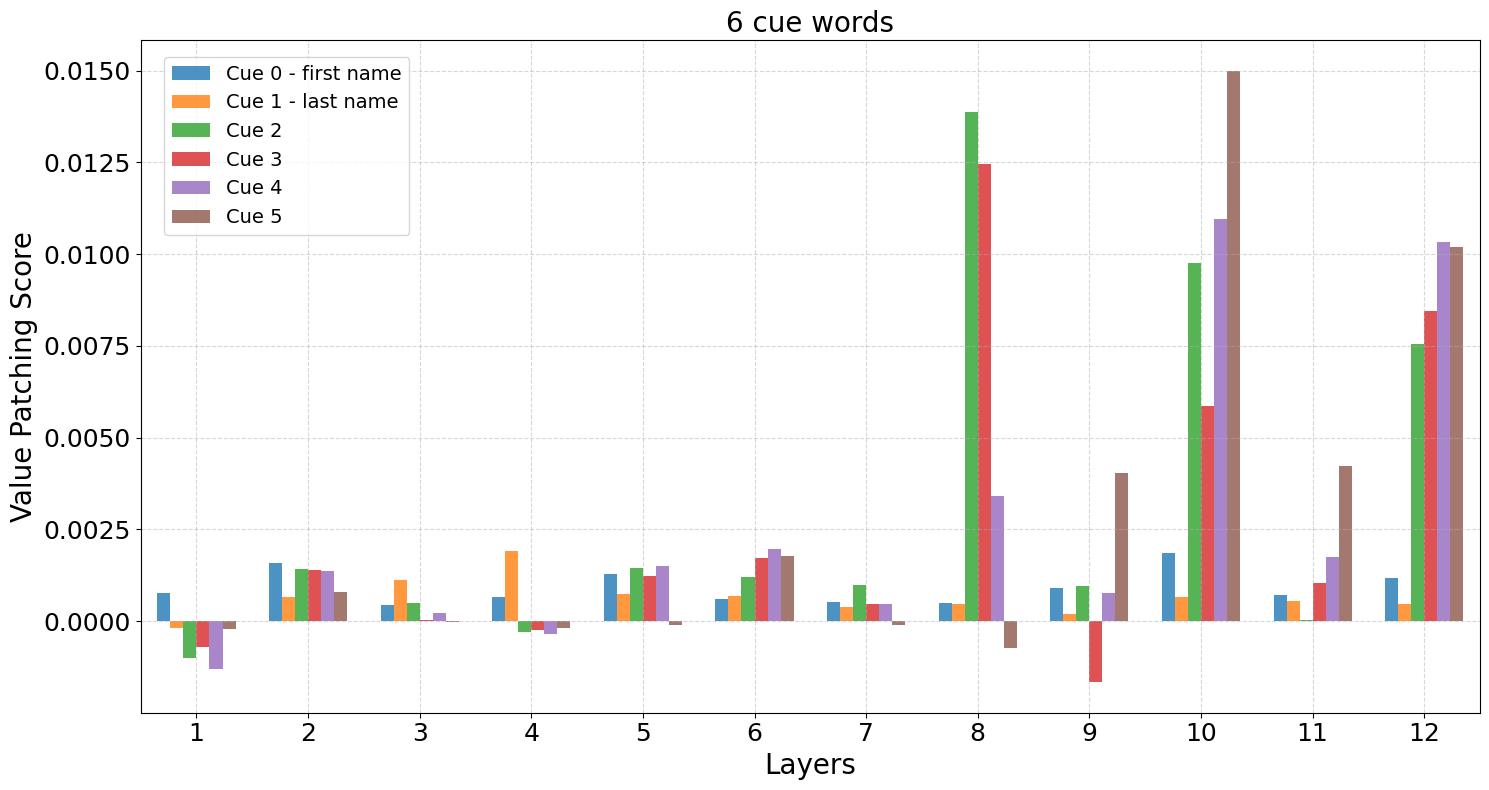

In [106]:
plot_vp(df_equal)

## GEMMA

### without fine-tuning

#### Examples with 2 cues

In [460]:
tokenizer = AutoTokenizer.from_pretrained('google/gemma-2b')

df = pd.read_pickle('../results_vp/gemma-2b_gender_agreement_2.pkl')
print('MASKED TEXT: ', df.iloc[0]['masked_text'])
print('CUE WORDS: ', df.iloc[0]['cue_words'])
print('TARGET WORD: ', df.iloc[0]['target_word'])
print('CLEAN TEXT: ', tokenizer.decode(df.iloc[0]['input_ids']))
print('CORRUPT TEXT: ', tokenizer.decode(df.iloc[0]['input_ids_corrupt']))
print('MODEL CLEAN PREDICTION: ', df.iloc[0]['model_top1_clean_prediction'])
print('MODEL CORRUPT PREDICTION: ', df.iloc[0]['model_top1_corrupt_prediction'])
print('DATAFRAME #ROWS: ', df.shape[0])

MASKED TEXT:  margaret becker is an american christian rock singer , guitarist , and songwriter .
CUE WORDS:  ['margaret|0|8', 'becker|9|15']
TARGET WORD:  she
CLEAN TEXT:  <bos>margaret becker is an american christian rock singer , guitarist , and songwriter .
CORRUPT TEXT:  <bos> aron willinsky is an american christian rock singer , guitarist , and songwriter .
MODEL CLEAN PREDICTION:   she
MODEL CORRUPT PREDICTION:   he
DATAFRAME #ROWS:  230


In [461]:
# investigating examples with correct model prediction
equality_condition = (df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower()) | (' '+df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower())
df_equal = df.loc[equality_condition]

keep_idxes = []
for i in range(len(df_equal)):
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'he' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'she':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'she' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'he':
        keep_idxes.append(i)
        
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'his' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'her':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'her' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'his':
        keep_idxes.append(i)

    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'him' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'hers':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'hers' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'him':
        keep_idxes.append(i)

    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'himself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'herself':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'herself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'himself':
        keep_idxes.append(i)

df_equal = df_equal.iloc[keep_idxes]

print('DATAFRAME #ROWS: ', df_equal.shape[0])
print('ACCURACY: ', df_equal.shape[0]/df.shape[0] * 100, '%')

DATAFRAME #ROWS:  128
ACCURACY:  55.65217391304348 %


In [462]:
# add cue words vp scores
df_equal['cueWordsVp_all_layersAndPos'] = df_equal.apply(
        lambda row: extract_cueWords_vp(row['vp_all_layersAndPos'], row['cues_tokenIdxes']), 
        axis=1
    )

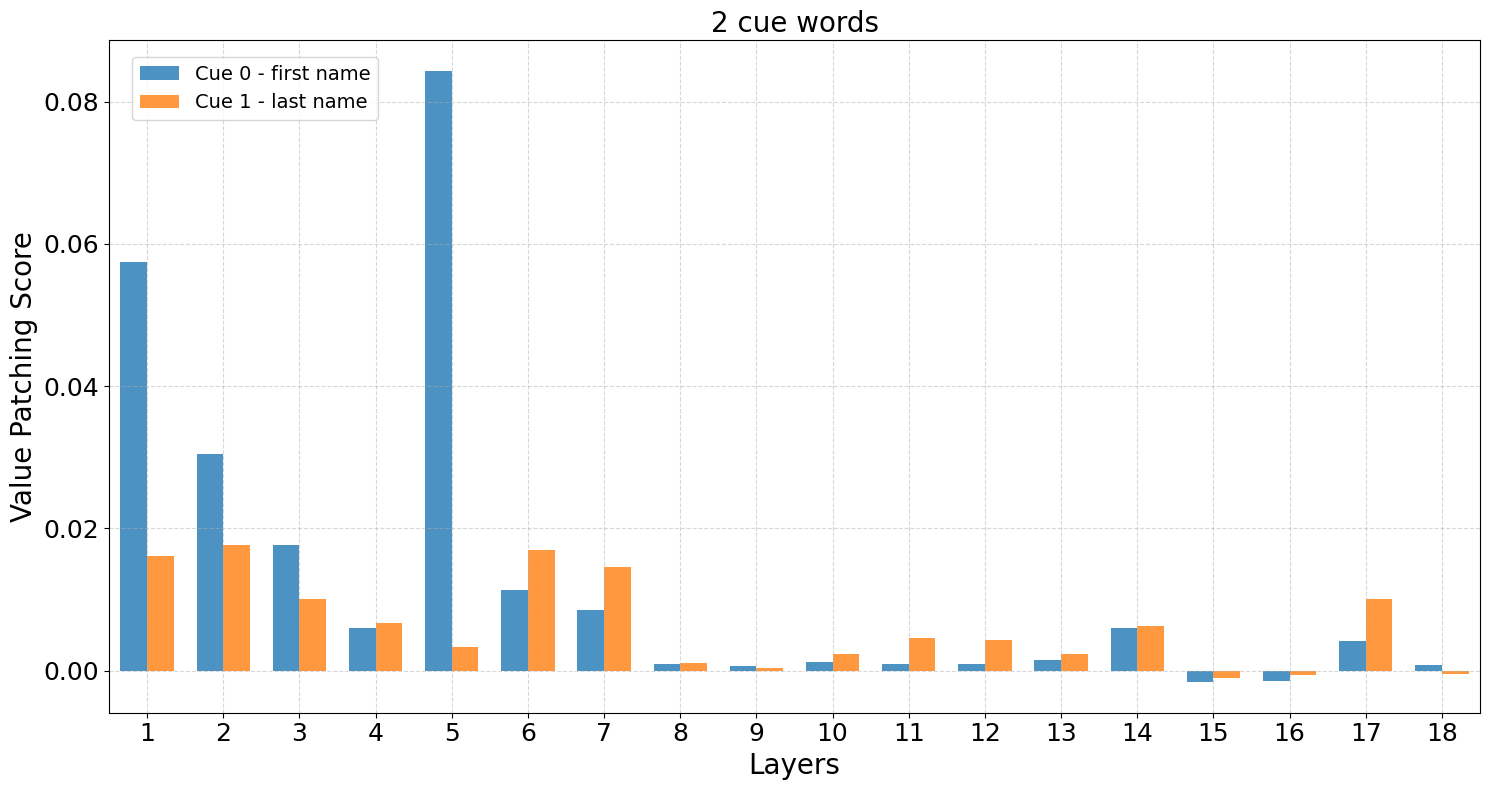

In [463]:
plot_vp(df_equal)

#### Examples with 4 cues

In [472]:
tokenizer = AutoTokenizer.from_pretrained('google/gemma-2b')

df = pd.read_pickle('../results_vp/gemma-2b_gender_agreement_4.pkl')
print('MASKED TEXT: ', df.iloc[0]['masked_text'])
print('CUE WORDS: ', df.iloc[0]['cue_words'])
print('TARGET WORD: ', df.iloc[0]['target_word'])
print('CLEAN TEXT: ', tokenizer.decode(df.iloc[0]['input_ids']))
print('CORRUPT TEXT: ', tokenizer.decode(df.iloc[0]['input_ids_corrupt']))
print('MODEL CLEAN PREDICTION: ', df.iloc[0]['model_top1_clean_prediction'])
print('MODEL CORRUPT PREDICTION: ', df.iloc[0]['model_top1_corrupt_prediction'])
print('DATAFRAME #ROWS: ', df.shape[0])

MASKED TEXT:  andy pyle is an english bass guitarist . he played with the kinks from 1976 -- 1978 . prior to that , he was in blodwyn pig and savoy brown . later ,
CUE WORDS:  ['andy|0|4', 'pyle|5|9', 'he|41|43', 'he|102|104']
TARGET WORD:  he
CLEAN TEXT:  <bos>andy pyle is an english bass guitarist . he played with the kinks from 1976 -- 1978 . prior to that , he was in blodwyn pig and savoy brown . later ,
CORRUPT TEXT:  <bos> amy willinsky is an english bass guitarist . she played with the kinks from 1976 -- 1978 . prior to that , she was in blodwyn pig and savoy brown . later ,
MODEL CLEAN PREDICTION:   he
MODEL CORRUPT PREDICTION:   she
DATAFRAME #ROWS:  235


In [473]:
# investigating examples with correct model prediction
equality_condition = (df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower()) | (' '+df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower())
df_equal = df.loc[equality_condition]

keep_idxes = []
for i in range(len(df_equal)):
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'he' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'she':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'she' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'he':
        keep_idxes.append(i)
        
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'his' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'her':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'her' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'his':
        keep_idxes.append(i)

    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'him' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'hers':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'hers' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'him':
        keep_idxes.append(i)

    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'himself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'herself':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'herself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'himself':
        keep_idxes.append(i)

df_equal = df_equal.iloc[keep_idxes]

print('DATAFRAME #ROWS: ', df_equal.shape[0])
print('ACCURACY: ', df_equal.shape[0]/df.shape[0] * 100, '%')

DATAFRAME #ROWS:  113
ACCURACY:  48.08510638297872 %


In [474]:
# add cue words vp scores
df_equal['cueWordsVp_all_layersAndPos'] = df_equal.apply(
        lambda row: extract_cueWords_vp(row['vp_all_layersAndPos'], row['cues_tokenIdxes']), 
        axis=1
    )

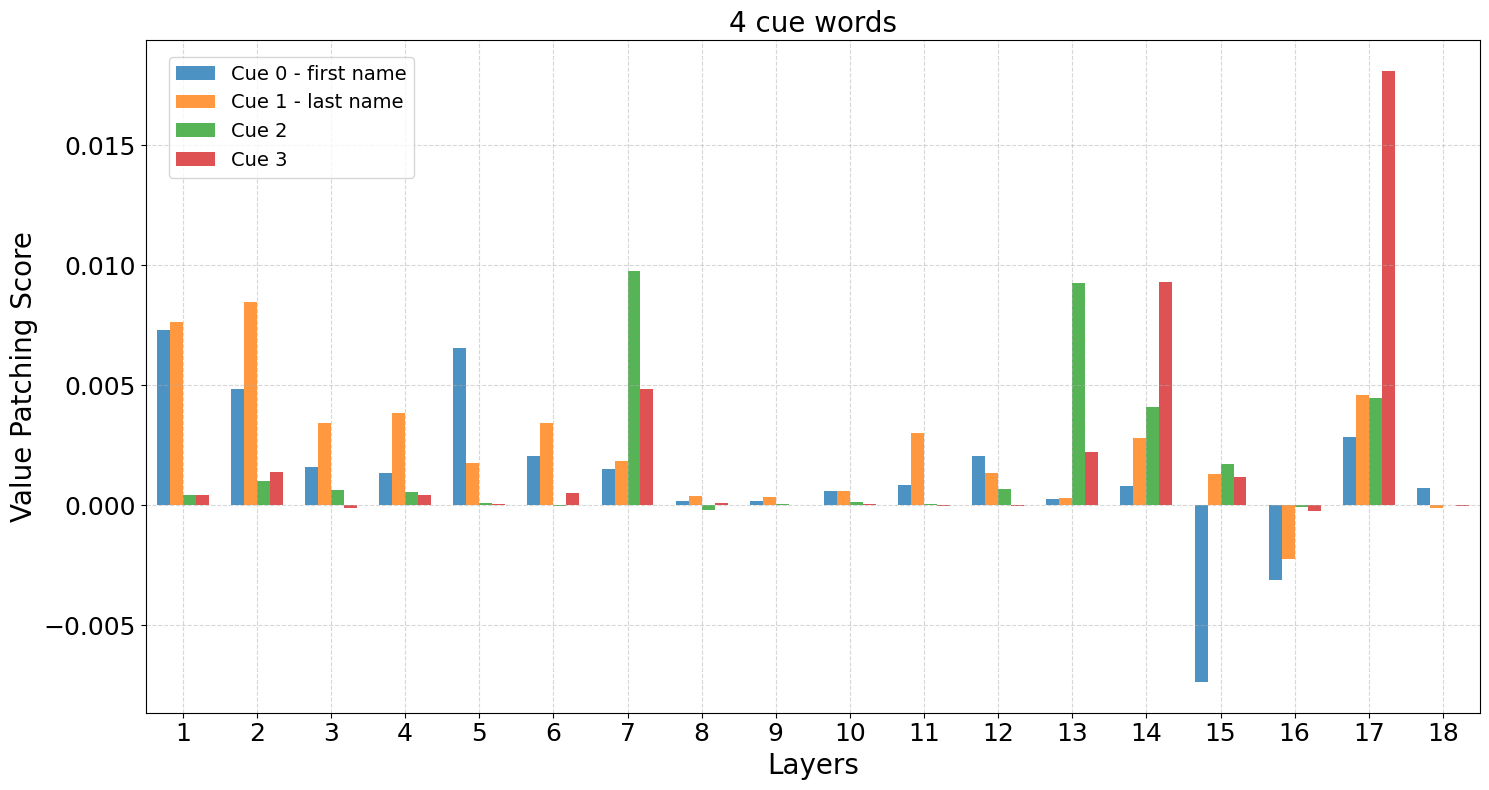

In [475]:
plot_vp(df_equal)

#### Examples with 6 cues

In [476]:
tokenizer = AutoTokenizer.from_pretrained('google/gemma-2b')

df = pd.read_pickle('../results_vp/gemma-2b_gender_agreement_6.pkl')
print('MASKED TEXT: ', df.iloc[0]['masked_text'])
print('CUE WORDS: ', df.iloc[0]['cue_words'])
print('TARGET WORD: ', df.iloc[0]['target_word'])
print('CLEAN TEXT: ', tokenizer.decode(df.iloc[0]['input_ids']))
print('CORRUPT TEXT: ', tokenizer.decode(df.iloc[0]['input_ids_corrupt']))
print('MODEL CLEAN PREDICTION: ', df.iloc[0]['model_top1_clean_prediction'])
print('MODEL CORRUPT PREDICTION: ', df.iloc[0]['model_top1_corrupt_prediction'])
print('DATAFRAME #ROWS: ', df.shape[0])

MASKED TEXT:  marilyn livingstone is a scottish labour co-operative politician , who served as the member of the scottish parliament for kirkcaldy constituency from 1999-2011 . before her election in 1999 she was the head of the business school at fife college . she was also a councillor on kirkcaldy district council and fife council . she won re-election from the kirkcaldy constituency in the 2003 and 2007 elections , but lost
CUE WORDS:  ['marilyn|0|7', 'livingstone|8|19', 'her|170|173', 'she|191|194', 'she|249|252', 'she|324|327']
TARGET WORD:  her
CLEAN TEXT:  <bos>marilyn livingstone is a scottish labour co-operative politician , who served as the member of the scottish parliament for kirkcaldy constituency from 1999-2011 . before her election in 1999 she was the head of the business school at fife college . she was also a councillor on kirkcaldy district council and fife council . she won re-election from the kirkcaldy constituency in the 2003 and 2007 elections , but lost
CORRUP

In [477]:
# investigating examples with correct model prediction
equality_condition = (df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower()) | (' '+df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower())
df_equal = df.loc[equality_condition]

keep_idxes = []
for i in range(len(df_equal)):
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'he' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'she':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'she' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'he':
        keep_idxes.append(i)
        
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'his' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'her':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'her' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'his':
        keep_idxes.append(i)

    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'him' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'hers':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'hers' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'him':
        keep_idxes.append(i)

    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'himself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'herself':
        keep_idxes.append(i)
    if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'herself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'himself':
        keep_idxes.append(i)

df_equal = df_equal.iloc[keep_idxes]

print('DATAFRAME #ROWS: ', df_equal.shape[0])
print('ACCURACY: ', df_equal.shape[0]/df.shape[0] * 100, '%')

DATAFRAME #ROWS:  78
ACCURACY:  34.51327433628318 %


In [478]:
# add cue words vp scores
df_equal['cueWordsVp_all_layersAndPos'] = df_equal.apply(
        lambda row: extract_cueWords_vp(row['vp_all_layersAndPos'], row['cues_tokenIdxes']), 
        axis=1
    )

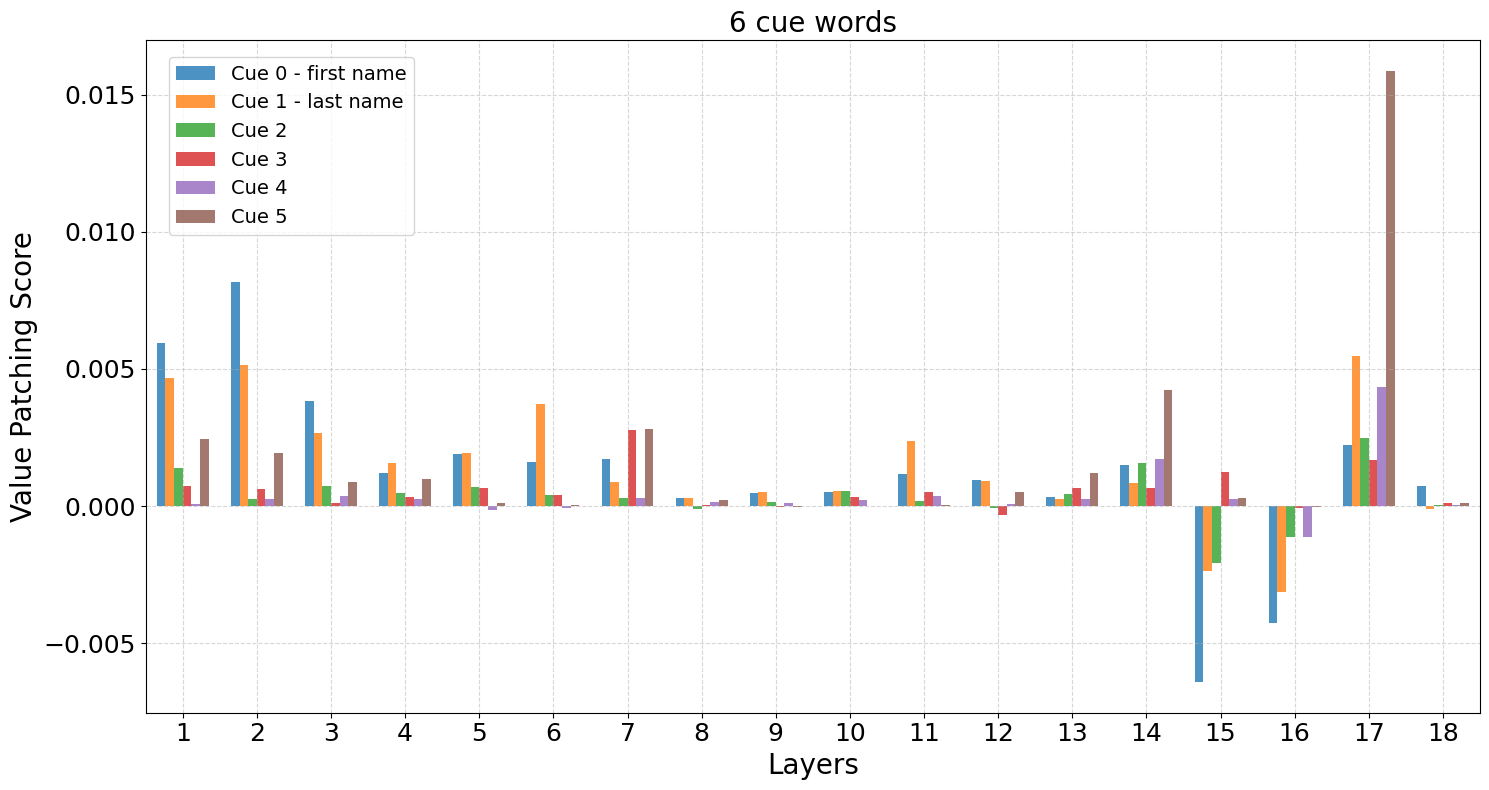

In [479]:
plot_vp(df_equal)

# Save all vp figures

In [598]:
ABLATION = True

for c in tqdm(range(2,7)):
    for model in ['bert-base-uncased', 'finetuned-bert', 'gpt2', 'finetuned-gpt2', 'gemma-2b']:
    # for model in ['bert-base-uncased', 'finetuned-bert', 'gpt2', 'finetuned-gpt2', 'roberta-base', 'finetuned-roberta', 'gemma-2b']:

        df_dir = f'../results_vp/{model}_gender_agreement_{c}.pkl' if not ABLATION else f'../results_vp/ablation/{model}_gender_agreement_{c}.pkl'
        df = pd.read_pickle(df_dir)
        
        equality_condition = (df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower()) | (' '+df['target_word'] == df['model_top1_clean_prediction'].astype(str).str.lower())
        df_equal = df.loc[equality_condition]
        
        keep_idxes = []
        for i in range(len(df_equal)):
            if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'he' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'she':
                keep_idxes.append(i)
            if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'she' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'he':
                keep_idxes.append(i)
                
            if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'his' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'her':
                keep_idxes.append(i)
            if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'her' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'his':
                keep_idxes.append(i)
        
            if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'him' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'hers':
                keep_idxes.append(i)
            if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'hers' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'him':
                keep_idxes.append(i)
        
            if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'himself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'herself':
                keep_idxes.append(i)
            if df.iloc[i]['model_top1_clean_prediction'].lower().strip() == 'herself' and df.iloc[i]['model_top1_corrupt_prediction'].lower().strip() == 'himself':
                keep_idxes.append(i)

        df_equal = df_equal.iloc[keep_idxes]
        
        # add cue words vp scores
        df_equal['cueWordsVp_all_layersAndPos'] = df_equal.apply(
                lambda row: extract_cueWords_vp(row['vp_all_layersAndPos'], row['cues_tokenIdxes']), 
                axis=1
            )
        # clear_output()
        save_dir = '../figs/all_vps_figs' if not ABLATION else '../figs/all_vps_figs/ablation'
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
            
        # save thes figures to the pdf format
        plot_vp(df_equal, file_name=save_dir + f'/{model}_{c}.pdf', ablation=ABLATION)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:12<00:00, 14.41s/it]
